In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [ ]:
data_file_path = '../data/censusbureau.data'
columns_file_path = '../data/census-bureau.columns'
with open(columns_file_path, 'r') as f:
    columns = [line.strip() for line in f if line.strip()]
df = pd.read_csv(data_file_path, header=None)
df.columns = columns

In [6]:
df.head()

age                 class of worker  detailed industry recode  \
0   73                 Not in universe                         0   
1   58  Self-employed-not incorporated                         4   
2   18                 Not in universe                         0   
3    9                 Not in universe                         0   
4   10                 Not in universe                         0   

   detailed occupation recode                   education  wage per hour  \
0                           0        High school graduate              0   
1                          34  Some college but no degree              0   
2                           0                  10th grade              0   
3                           0                    Children              0   
4                           0                    Children              0   

  enroll in edu inst last wk   marital stat          major industry code  \
0            Not in universe        Widowed  Not in universe or children   
1            Not in universe       Divorced                 Construction   
2                High school  Never married  Not in universe or children   
3            Not in universe  Never married  Not in universe or children   
4            Not in universe  Never married  Not in universe or children   

                 major occupation code                       race  \
0                      Not in universe                      White   
1  Precision production craft & repair                      White   
2                      Not in universe  Asian or Pacific Islander   
3                      Not in universe                      White   
4                      Not in universe                      White   

  hispanic origin     sex member of a labor union reason for unemployment  \
0       All other  Female         Not in universe         Not in universe   
1       All other    Male         Not in universe         Not in universe   
2       All other  Female         Not in universe         Not in universe   
3       All other  Female         Not in universe         Not in universe   
4       All other  Female         Not in universe         Not in universe   

  full or part time employment stat  capital gains  capital losses  \
0                Not in labor force              0               0   
1          Children or Armed Forces              0               0   
2                Not in labor force              0               0   
3          Children or Armed Forces              0               0   
4          Children or Armed Forces              0               0   

   dividends from stocks     tax filer stat region of previous residence  \
0                      0           Nonfiler              Not in universe   
1                      0  Head of household                        South   
2                      0           Nonfiler              Not in universe   
3                      0           Nonfiler              Not in universe   
4                      0           Nonfiler              Not in universe   

  state of previous residence        detailed household and family stat  \
0             Not in universe  Other Rel 18+ ever marr not in subfamily   
1                    Arkansas                               Householder   
2             Not in universe   Child 18+ never marr Not in a subfamily   
3             Not in universe     Child <18 never marr not in subfamily   
4             Not in universe     Child <18 never marr not in subfamily   

  detailed household summary in household   weight  \
0           Other relative of householder  1700.09   
1                             Householder  1053.55   
2                       Child 18 or older   991.95   
3            Child under 18 never married  1758.14   
4            Child under 18 never married  1069.16   

  migration code-change in msa migration code-change in reg  \
0                            ?                            ?   
1                   MS

In [7]:
print(df.columns)

Index(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'ow

In [8]:
target = 'label'
weight_column = 'weight'
continuous_columns = ['age','wage per hour','capital gains','capital losses','dividends from stocks','num persons worked for employer','weeks worked in year']
categorical_columns = [col for col in df.columns if col not in continuous_columns + [target,weight_column]]
print(categorical_columns)

['class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', "fill inc questionnaire for veteran's admin", 'veterans benefits', 'year']


In [9]:
df.describe()

age  detailed industry recode  detailed occupation recode  \
count  199523.000000             199523.000000               199523.000000   
mean       34.494199                 15.352320                   11.306556   
std        22.310895                 18.067129                   14.454204   
min         0.000000                  0.000000                    0.000000   
25%        15.000000                  0.000000                    0.000000   
50%        33.000000                  0.000000                    0.000000   
75%        50.000000                 33.000000                   26.000000   
max        90.000000                 51.000000                   46.000000   

       wage per hour  capital gains  capital losses  dividends from stocks  \
count  199523.000000   199523.00000   199523.000000          199523.000000   
mean       55.426908      434.71899       37.313788             197.529533   
std       274.896454     4697.53128      271.896428            1984.163658   
min         0.000000        0.00000        0.000000               0.000000   
25%         0.000000        0.00000        0.000000               0.000000   
50%         0.000000        0.00000        0.000000               0.000000   
75%         0.000000        0.00000        0.000000               0.000000   
max      9999.000000    99999.00000     4608.000000           99999.000000   

              weight  num persons worked for employer  \
count  199523.000000                    199523.000000   
mean     1740.380269                         1.956180   
std       993.768156                         2.365126   
min        37.870000                         0.000000   
25%      1061.615000                         0.000000   
50%      1618.310000                         1.000000   
75%      2188.610000                         4.000000   
max     18656.300000                         6.000000   

       own business or self employed  veterans benefits  weeks worked in year  \
count                  199523.000000      199523.000000         199523.000000   
mean                        0.175438           1.514833             23.174897   
std                         0.553694           0.851473             24.411488   
min                         0.000000           0.000000              0.000000   
25%                         0.000000           2.000000              0.000000   
50%                         0.000000           2.000000              8.000000   
75%                         0.000000           2.000000             52.000000   
max                         2.000000           2.000000             52.000000   

                year  
count  199523.000000  
mean       94.499672  
std         0.500001  
min        94.000000  
25%        94.000000  
50%        94.000000  
75%        95.000000  
max        95.000000

In [10]:
len(df)

199523

In [11]:
print(df.isna().sum().to_json())

{"age":0,"class of worker":0,"detailed industry recode":0,"detailed occupation recode":0,"education":0,"wage per hour":0,"enroll in edu inst last wk":0,"marital stat":0,"major industry code":0,"major occupation code":0,"race":0,"hispanic origin":874,"sex":0,"member of a labor union":0,"reason for unemployment":0,"full or part time employment stat":0,"capital gains":0,"capital losses":0,"dividends from stocks":0,"tax filer stat":0,"region of previous residence":0,"state of previous residence":0,"detailed household and family stat":0,"detailed household summary in household":0,"weight":0,"migration code-change in msa":0,"migration code-change in reg":0,"migration code-move within reg":0,"live in this house 1 year ago":0,"migration prev res in sunbelt":0,"num persons worked for employer":0,"family members under 18":0,"country of birth father":0,"country of birth mother":0,"country of birth self":0,"citizenship":0,"own business or self employed":0,"fill inc questionnaire for veteran's admi

In [12]:
df.columns[df.eq('?').any()]

Index(['state of previous residence', 'migration code-change in msa',
       'migration code-change in reg', 'migration code-move within reg',
       'migration prev res in sunbelt', 'country of birth father',
       'country of birth mother', 'country of birth self'],
      dtype='object')

In [13]:
df.replace(["?", np.nan],'Unknown', inplace=True)

In [14]:
df.describe()

age  detailed industry recode  detailed occupation recode  \
count  199523.000000             199523.000000               199523.000000   
mean       34.494199                 15.352320                   11.306556   
std        22.310895                 18.067129                   14.454204   
min         0.000000                  0.000000                    0.000000   
25%        15.000000                  0.000000                    0.000000   
50%        33.000000                  0.000000                    0.000000   
75%        50.000000                 33.000000                   26.000000   
max        90.000000                 51.000000                   46.000000   

       wage per hour  capital gains  capital losses  dividends from stocks  \
count  199523.000000   199523.00000   199523.000000          199523.000000   
mean       55.426908      434.71899       37.313788             197.529533   
std       274.896454     4697.53128      271.896428            1984.163658   
min         0.000000        0.00000        0.000000               0.000000   
25%         0.000000        0.00000        0.000000               0.000000   
50%         0.000000        0.00000        0.000000               0.000000   
75%         0.000000        0.00000        0.000000               0.000000   
max      9999.000000    99999.00000     4608.000000           99999.000000   

              weight  num persons worked for employer  \
count  199523.000000                    199523.000000   
mean     1740.380269                         1.956180   
std       993.768156                         2.365126   
min        37.870000                         0.000000   
25%      1061.615000                         0.000000   
50%      1618.310000                         1.000000   
75%      2188.610000                         4.000000   
max     18656.300000                         6.000000   

       own business or self employed  veterans benefits  weeks worked in year  \
count                  199523.000000      199523.000000         199523.000000   
mean                        0.175438           1.514833             23.174897   
std                         0.553694           0.851473             24.411488   
min                         0.000000           0.000000              0.000000   
25%                         0.000000           2.000000              0.000000   
50%                         0.000000           2.000000              8.000000   
75%                         0.000000           2.000000             52.000000   
max                         2.000000           2.000000             52.000000   

                year  
count  199523.000000  
mean       94.499672  
std         0.500001  
min        94.000000  
25%        94.000000  
50%        94.000000  
75%        95.000000  
max        95.000000

In [15]:
df['race'].unique()

array(['White', 'Asian or Pacific Islander',
       'Amer Indian Aleut or Eskimo', 'Black', 'Other'], dtype=object)

In [16]:
df.groupby(['race','hispanic origin'],dropna=False).size()

race                         hispanic origin          
Amer Indian Aleut or Eskimo  All other                      2069
                             Central or South American         5
                             Chicano                           3
                             Mexican (Mexicano)               57
                             Mexican-American                 74
                             Other Spanish                    26
                             Puerto Rican                      2
                             Unknown                          15
Asian or Pacific Islander    All other                      5724
                             Central or South American        27
                             Mexican (Mexicano)                9
                             Mexican-American                  5
                             Other Spanish                    40
                             Puerto Rican                     16
                             Unknown                          14
Black                        All other                     19784
                             Central or South American       204
                             Cuban                            43
                             Do not know                       3
                             Mexican (Mexicano)               10
                             Mexican-American                 11
                             Other Spanish                   109
                             Puerto Rican                    157
                             Unknown                          94
Other                        All other                       750
                             Central or South American       467
                             Chicano                          42
                             Cuban                            30
                             Do not know                       2
                             Mexican (Mexicano)              934
                             Mexican-American                578
                             Other Spanish                   288
                             Puerto Rican                    552
                             Unknown                          14
White                        All other                    143580
                             Central or South American      3192
                             Chicano                         259
                             Cuban                          1053
                             Do not know                     301
                             Mexican (Mexicano)             6224
                             Mexican-American               7411
                             Other Spanish                  2022
                             Puerto Rican                   2586
                             Unknown                         737
dtype: int64

In [17]:
df.groupby(['reason for unemployment','class of worker'],dropna=False).size()

reason for unemployment  class of worker               
Job leaver               Federal government                    41
                         Local government                      12
                         Private                              515
                         Self-employed-incorporated             3
                         Self-employed-not incorporated        19
                         State government                       8
Job loser - on layoff    Federal government                    15
                         Local government                      21
                         Private                              887
                         Self-employed-incorporated             4
                         Self-employed-not incorporated        28
                         State government                      21
New entrant              Never worked                         439
Not in universe          Federal government                  2787
                         Local government                    7603
                         Not in universe                   100245
                         Private                            67081
                         Self-employed-incorporated          3234
                         Self-employed-not incorporated      8227
                         State government                    4114
                         Without pay                          162
Other job loser          Federal government                    32
                         Local government                      45
                         Private                             1848
                         Self-employed-incorporated            12
                         Self-employed-not incorporated        73
                         State government                      27
                         Without pay                            1
Re-entrant               Federal government                    50
                         Local government                     103
                         Private                             1697
                         Self-employed-incorporated            12
                         Self-employed-not incorporated        98
                         State government                      57
                         Without pay                            2
dtype: int64

In [18]:
for i in categorical_columns:
  print(df[i].value_counts(dropna=False))

class of worker
Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: count, dtype: int64
detailed industry recode
0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
35      3380
39      2937
34      2765
44      2549
2       2196
11      1764
50      1704
40      1651
47      1644
38      1629
24      1503
12      1350
19      1346
30      1181
31      1178
25      1084
9        993
22       952
36       945
13       899
1        827
48       652
27       626
49       610
3        563
21       559
6        554
5        553
8        550
16       539
23       525
18       483
15       452
7    

# EDA

# Univariate


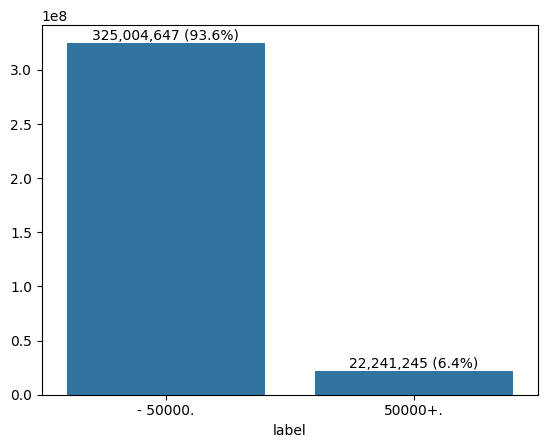

In [19]:
# TARGET - INCOME - weighted sum
weighted = df.groupby('label')['weight'].sum()
total_weight = weighted.sum()

ax = sns.barplot(x=weighted.index, y=weighted.values)

for i, v in enumerate(weighted.values):
    ax.text(i, v, f"{v:,.0f} ({v/total_weight:.1%})",ha='center', va='bottom')
plt.show()

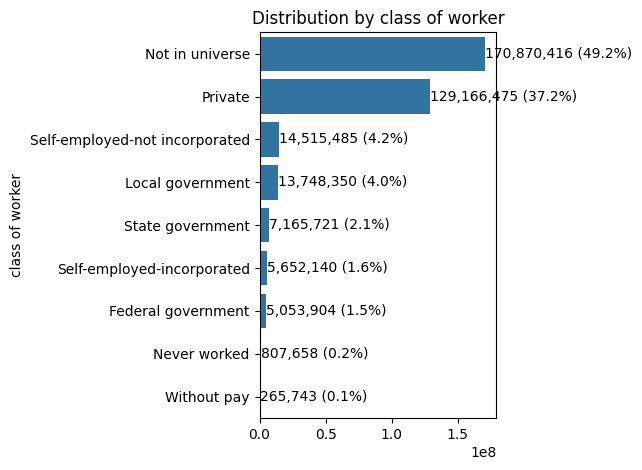

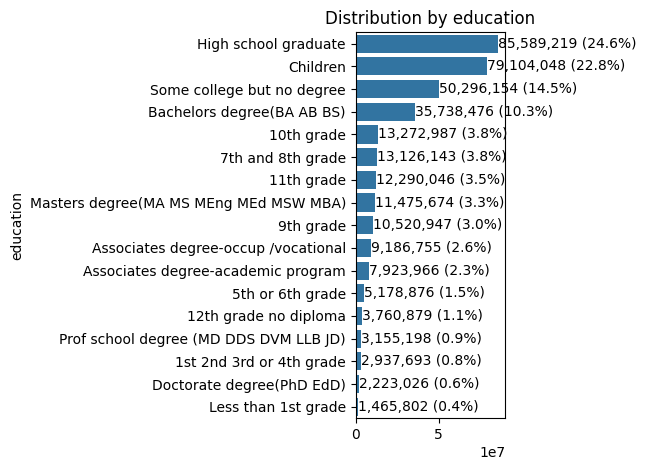

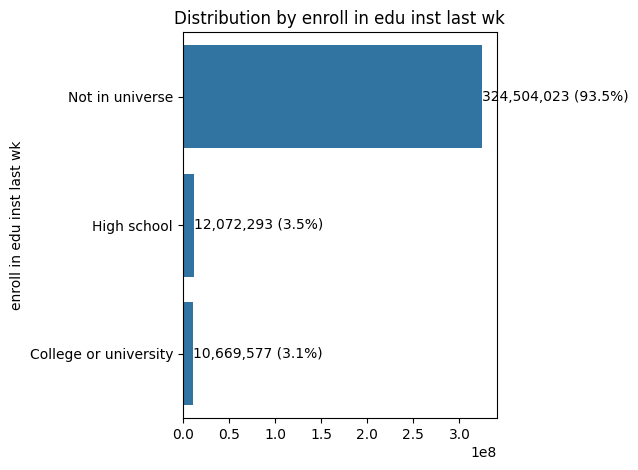

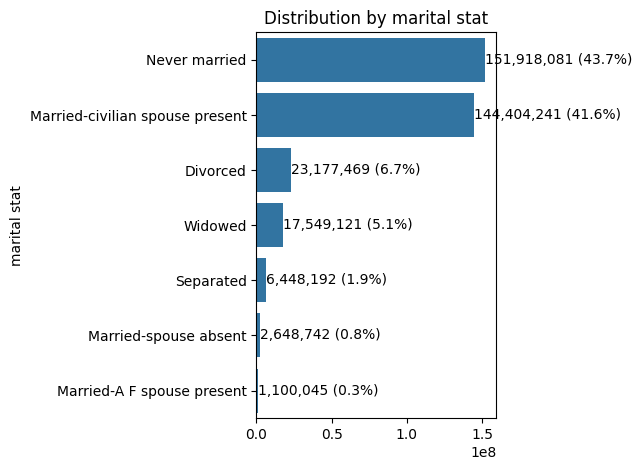

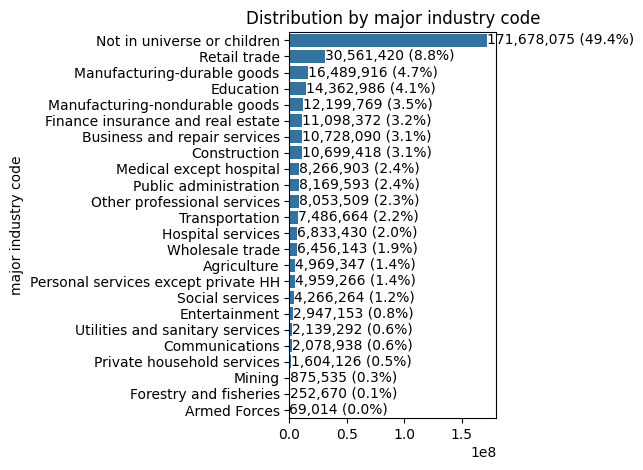

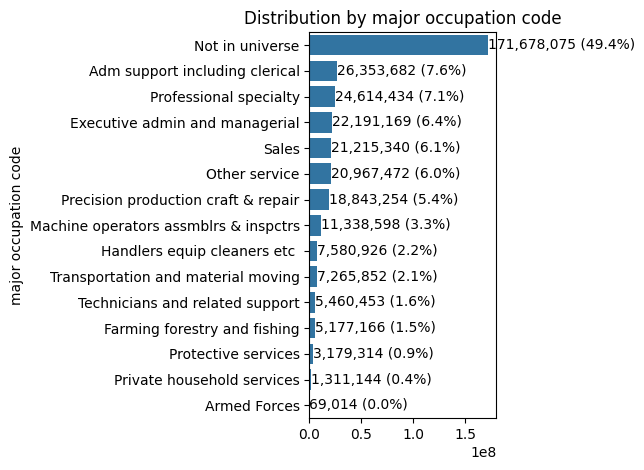

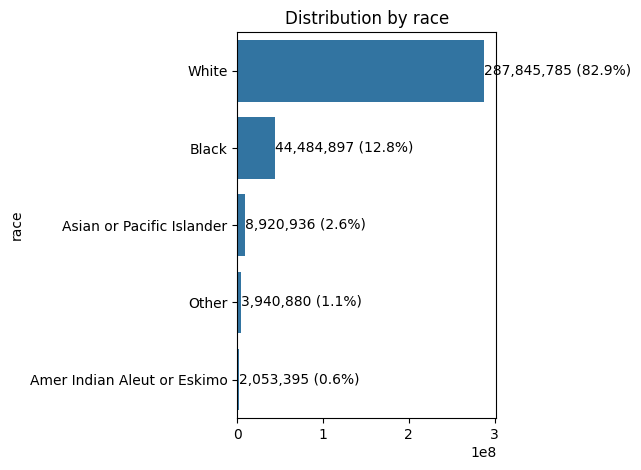

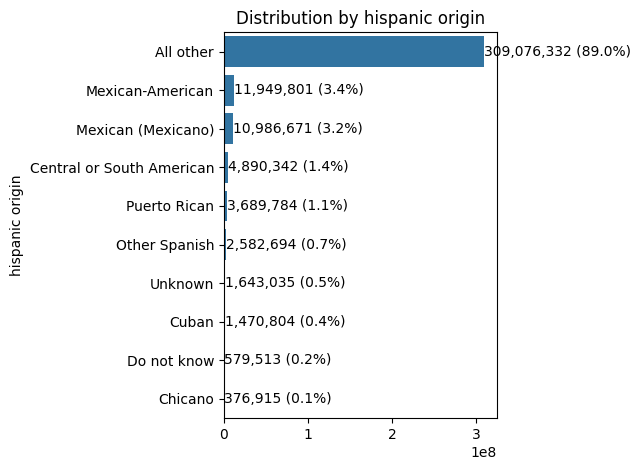

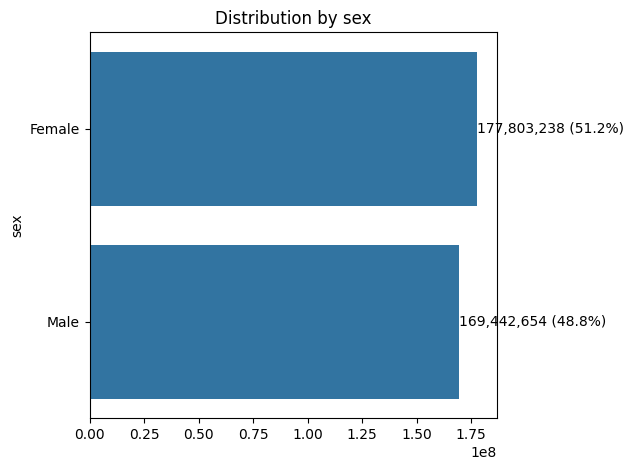

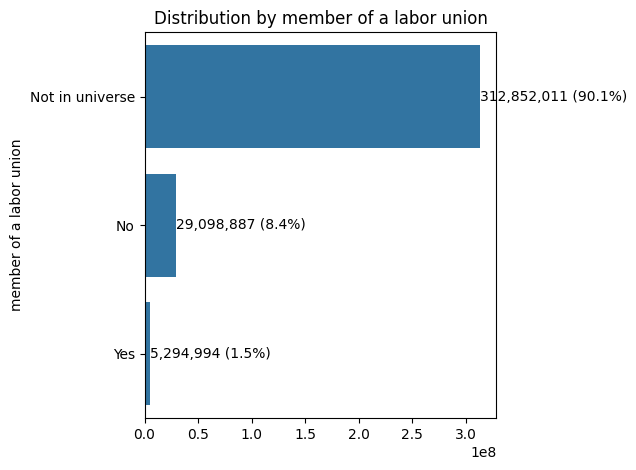

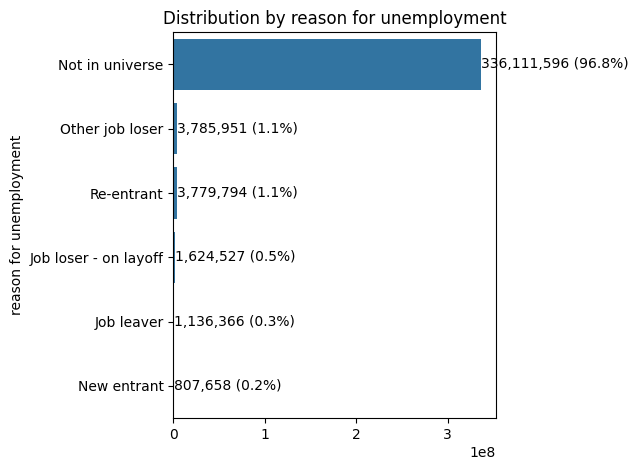

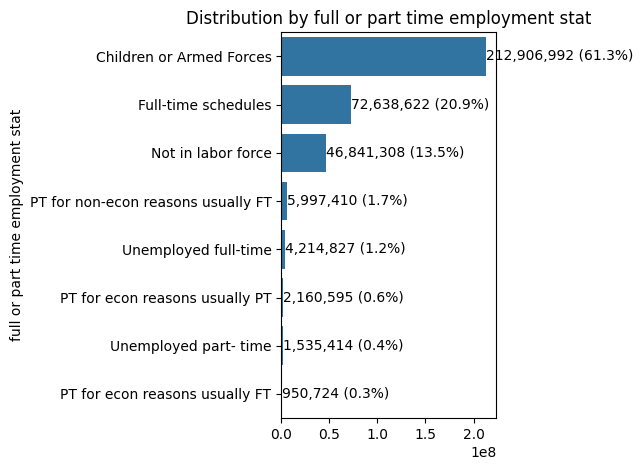

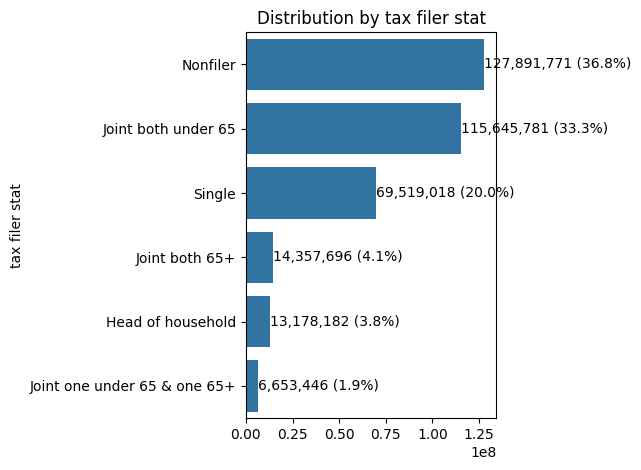

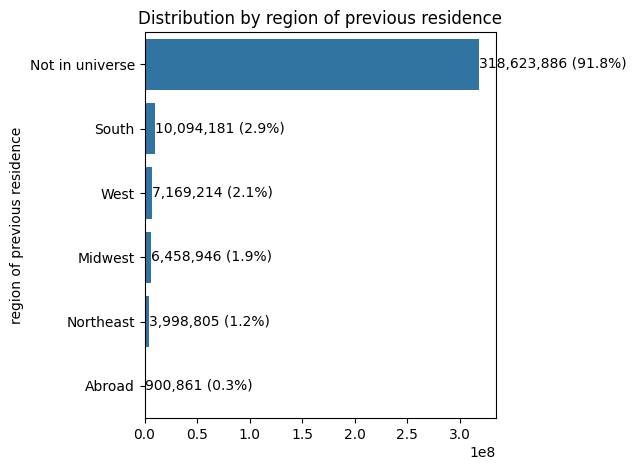

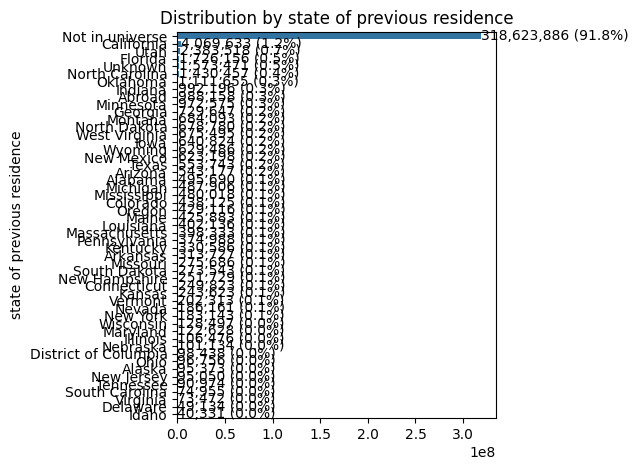

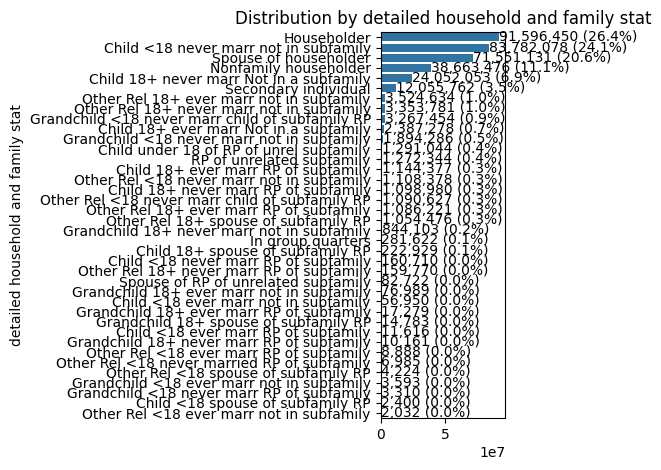

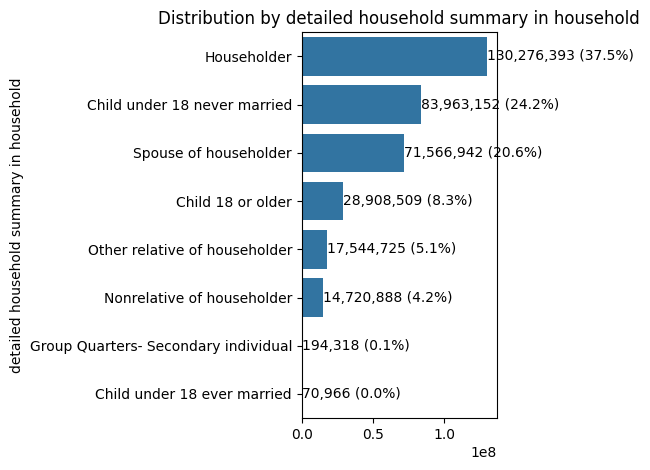

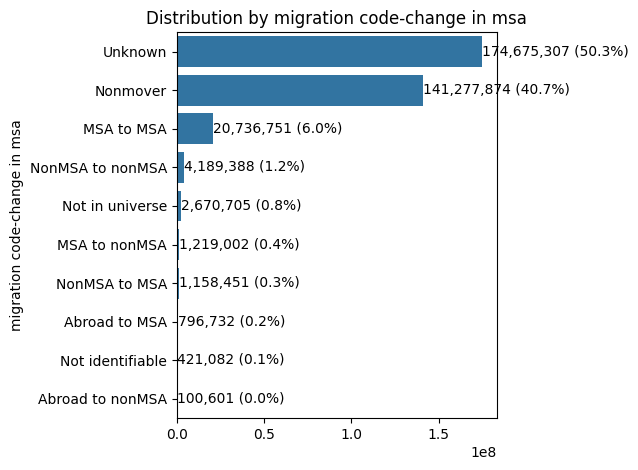

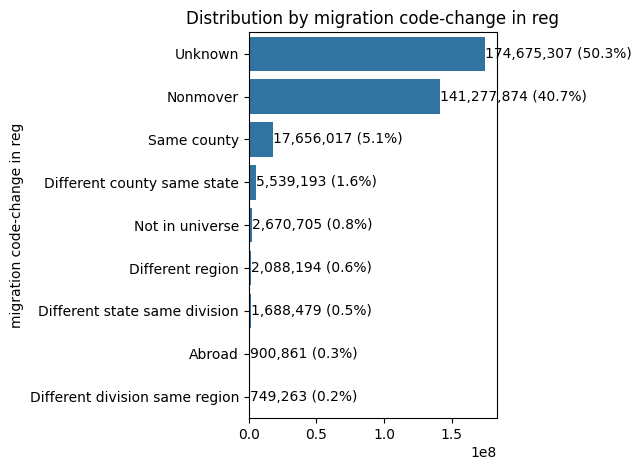

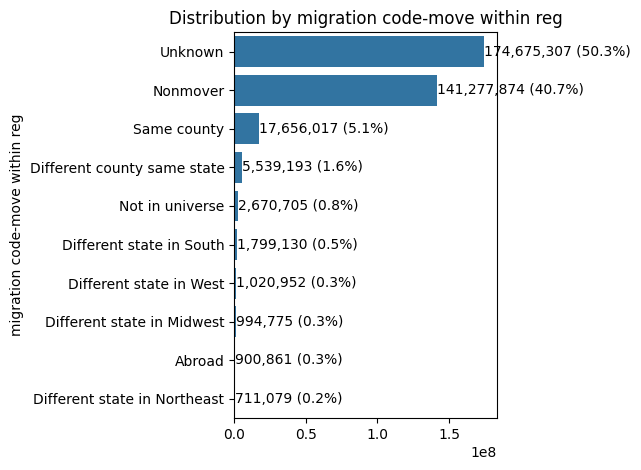

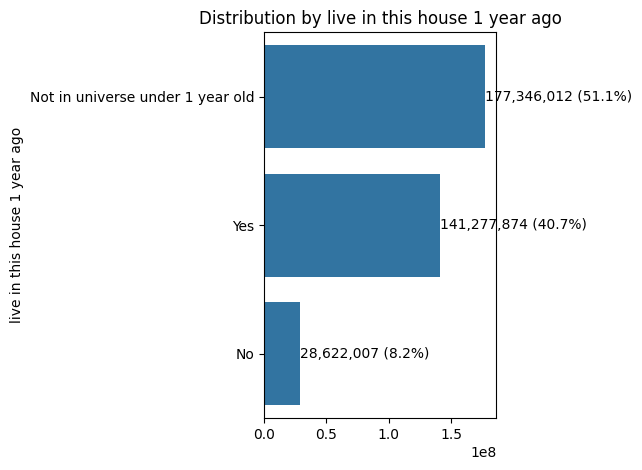

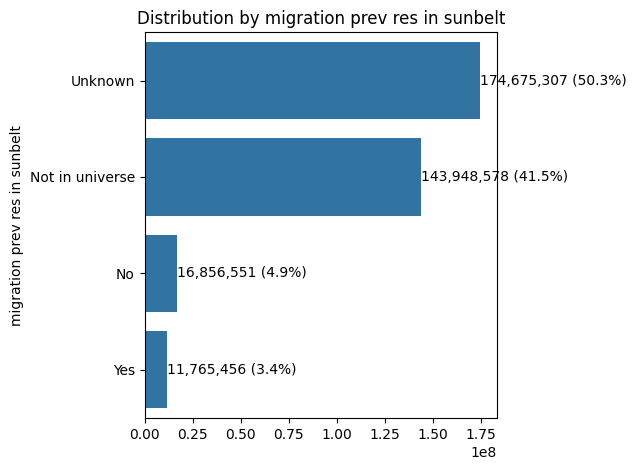

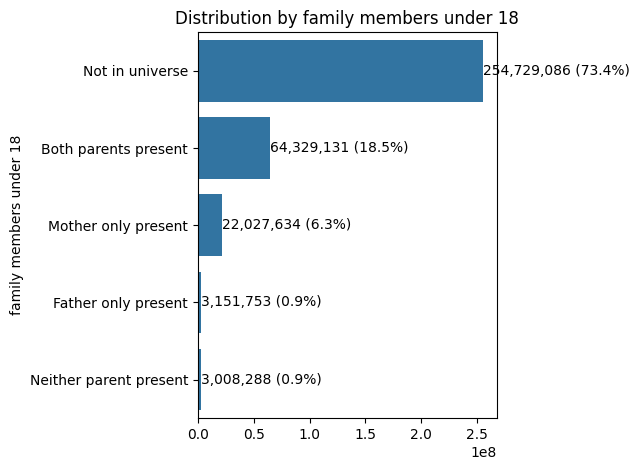

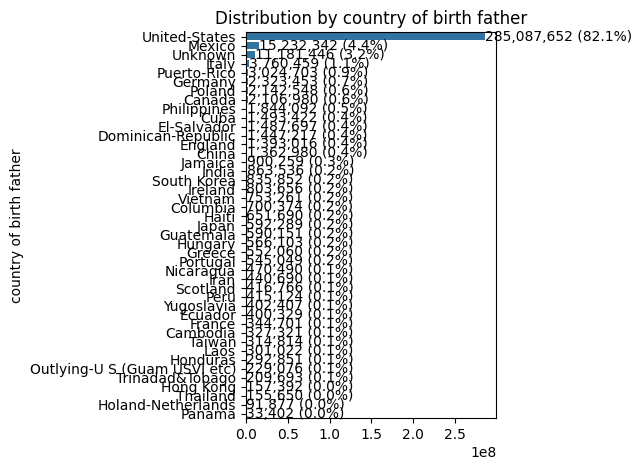

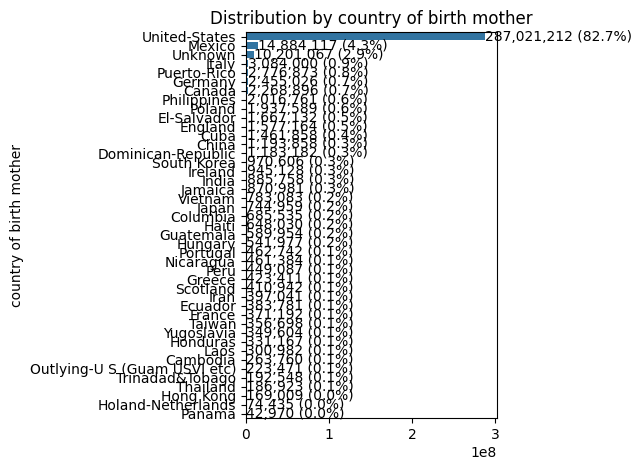

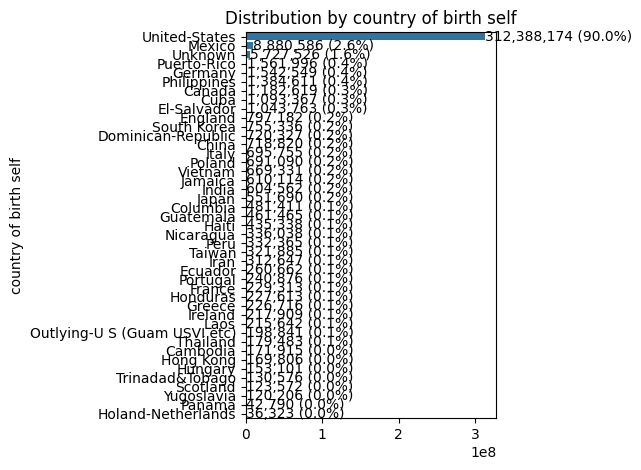

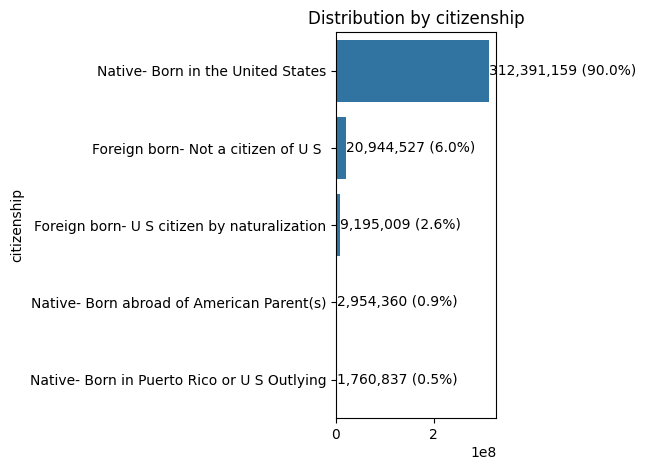

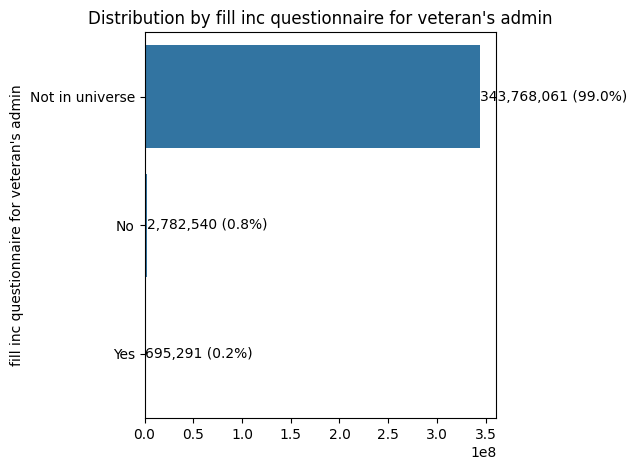

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. matplotlib.backends._backend_agg.RendererAgg(width: int, height: int, dpi: float)

Invoked with: 43762110871, 435, 100.0

<Figure size 640x480 with 1 Axes>

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. matplotlib.backends._backend_agg.RendererAgg(width: int, height: int, dpi: float)

Invoked with: 43319476550, 435, 100.0

<Figure size 640x480 with 1 Axes>

In [20]:
for col in categorical_columns:
  if col in ['veteran benefits','own business or self employed','detailed industry recode','detailed occupation recode']:
    continue
  else:
    # Weighted aggregation
    weighted = df.groupby(col)['weight'].sum().sort_values(ascending=False)
    total_weight = weighted.sum()

    # Horizontal bar plot
    ax = sns.barplot(x=weighted.values, y=weighted.index)

    # Add labels
    for i, v in enumerate(weighted.values):
        ax.text(v, i, f"{v:,.0f} ({v/total_weight:.1%})", va='center')

    plt.title(f"Distribution by {col}")
    plt.tight_layout()
    plt.show()

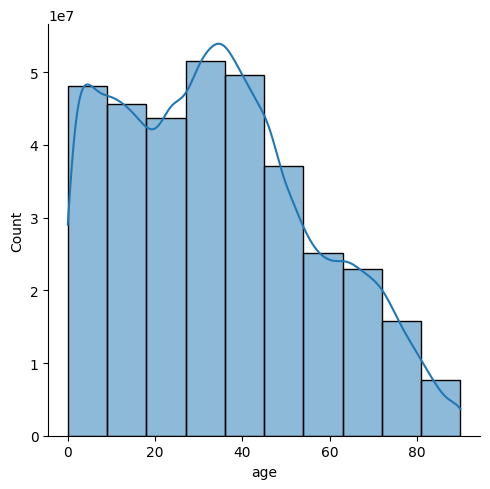

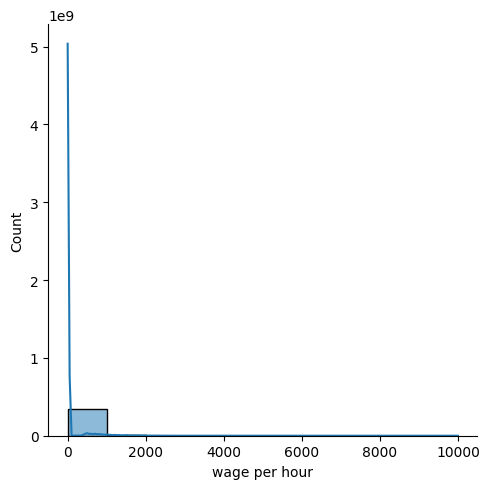

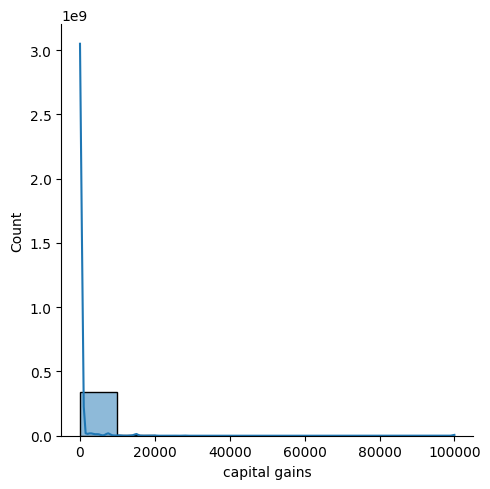

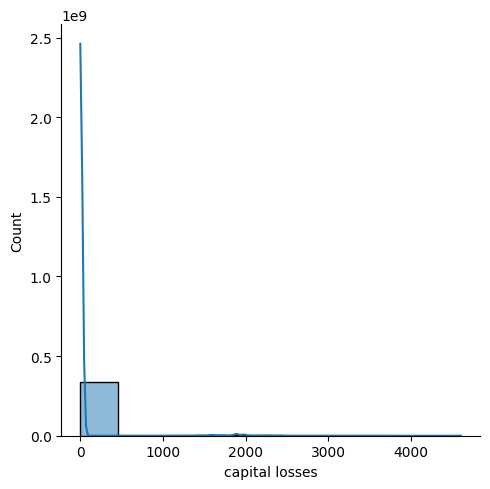

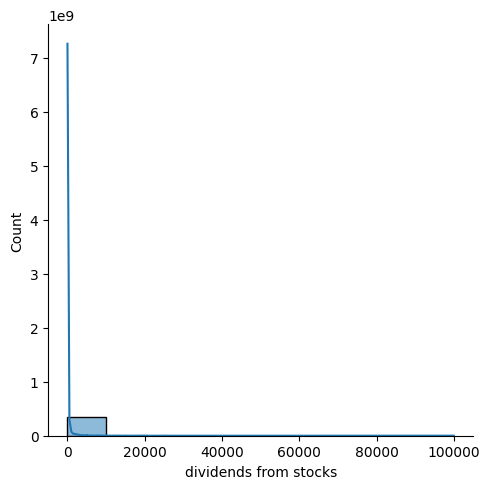

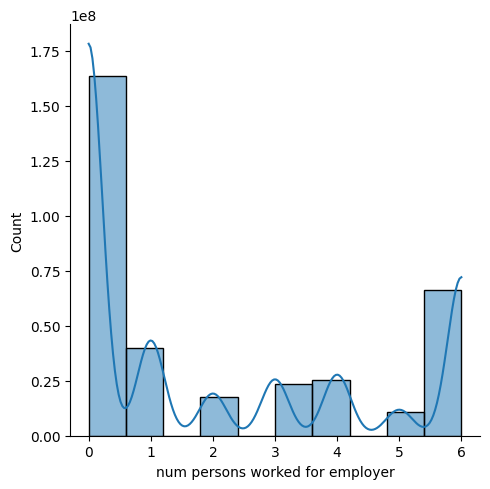

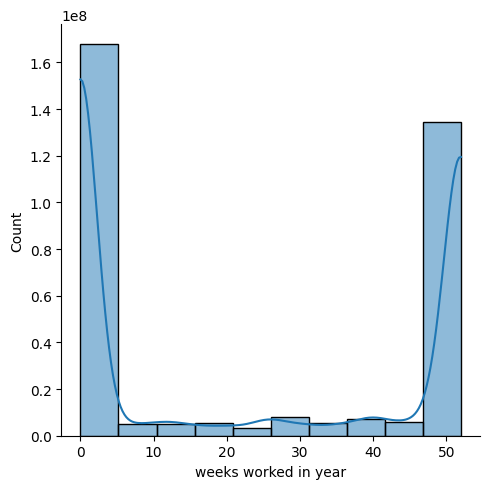

In [ ]:
for i in continuous_columns:
  sns.displot(data=df, x=i, weights = df['weight'], kde=True)
  plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame


array([0])

In [ ]:
def boxplot(values, freqs):
    col_name = values.name
    values = np.array(values)
    freqs = np.array(freqs)

    arg_sorted = np.argsort(values)
    values = values[arg_sorted]
    freqs = freqs[arg_sorted]

    count = freqs.sum()
    fx = values * freqs
    mean = fx.sum() / count

    minimum = np.min(values)
    maximum = np.max(values)

    cumcount = np.cumsum(freqs)

    # Fix 1: use side='right' to correctly locate quartile positions
    Q1 = values[np.searchsorted(cumcount, 0.25 * count, side='right')]
    Q2 = values[np.searchsorted(cumcount, 0.50 * count, side='right')]
    Q3 = values[np.searchsorted(cumcount, 0.75 * count, side='right')]

    IQR = Q3 - Q1

    # Fix 2: clip whiskers to nearest real data point within the fence
    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR

    whishi = np.max(values[values <= upper_fence])
    whislo = np.min(values[values >= lower_fence])

    # Fix 3: compute actual outliers beyond the whisker fences
    fliers = values[(values < lower_fence) | (values > upper_fence)]

    stats = [{
        'label': col_name,
        'mean': mean,
        'iqr': IQR,
        'whishi': whishi,   # Fix 4: was wrongly set to maximum
        'whislo': whislo,   # Fix 4: was wrongly set to minimum
        'fliers': fliers,
        'q1': Q1,
        'med': Q2,
        'q3': Q3
    }]

    _, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True)
    axes.bxp(stats)
    plt.show()

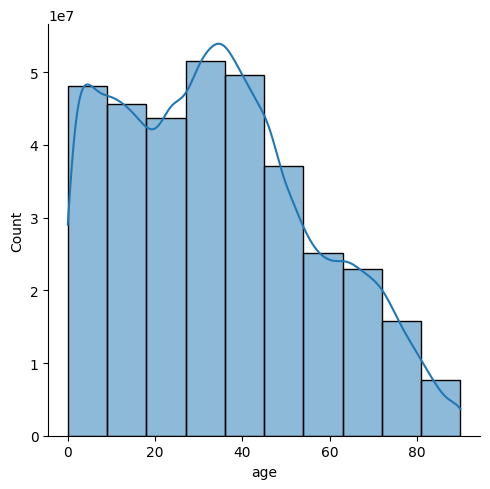

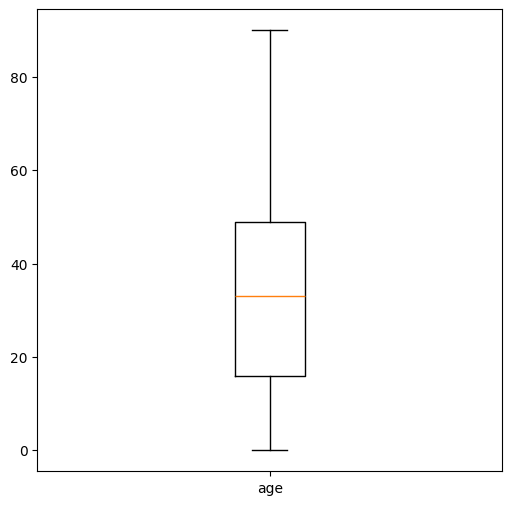

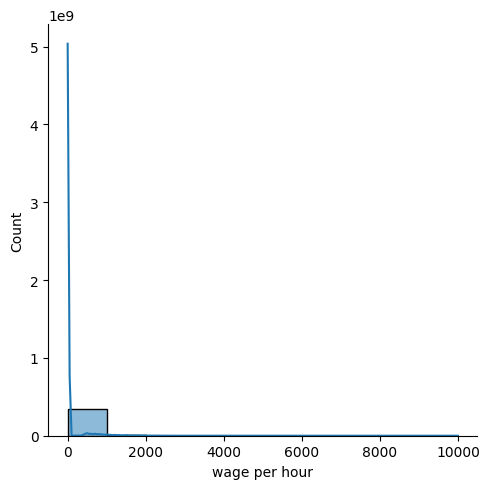

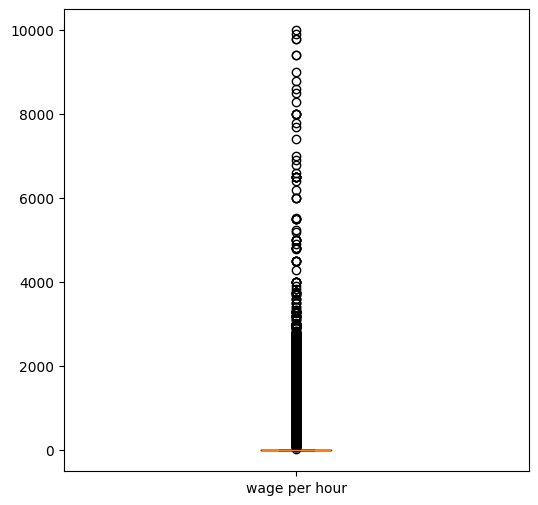

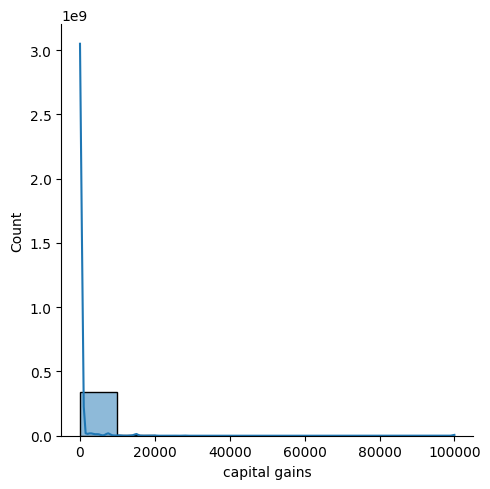

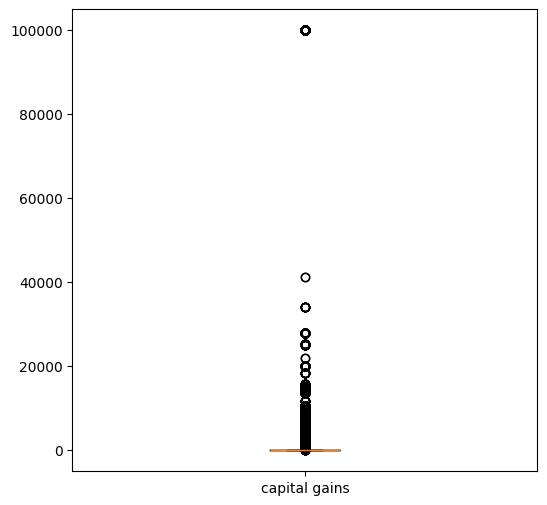

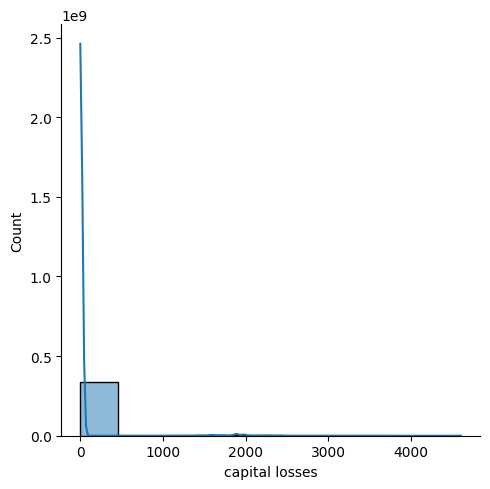

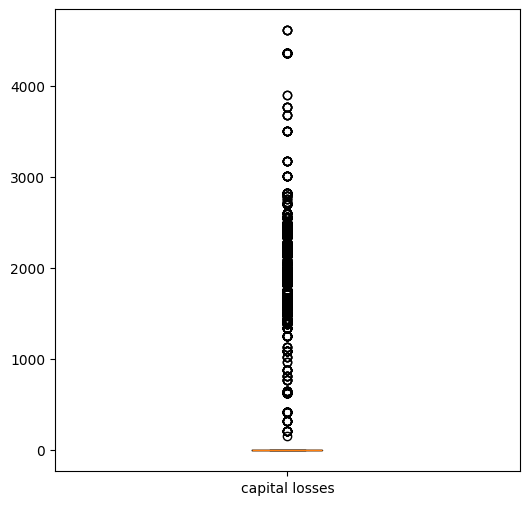

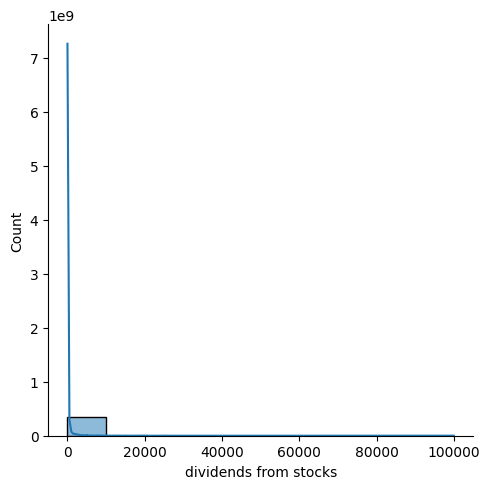

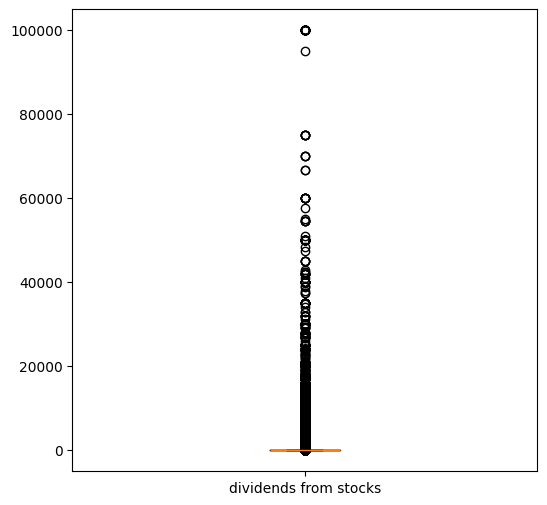

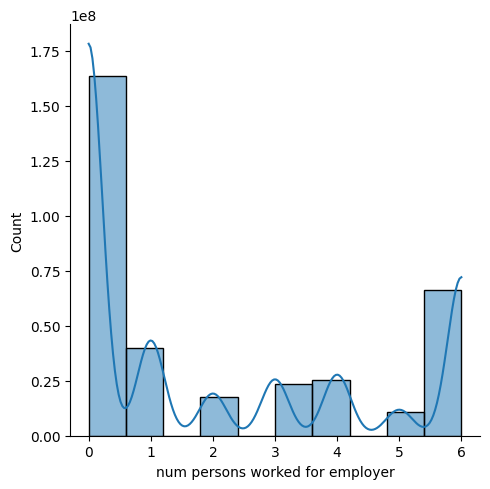

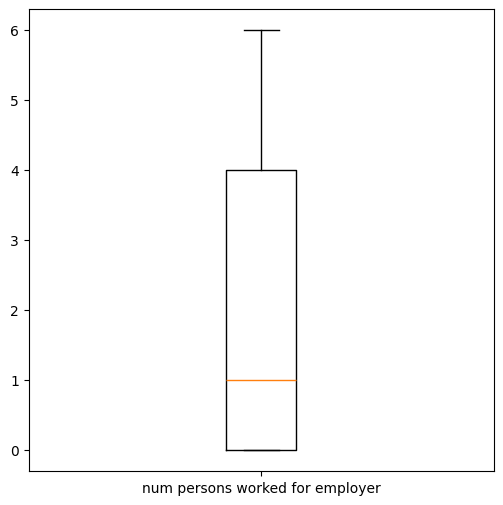

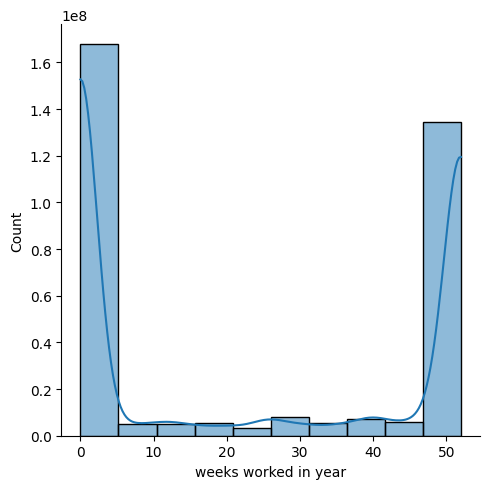

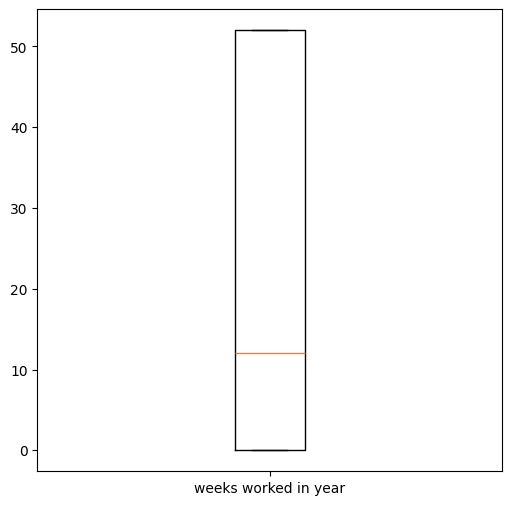

In [ ]:
for i in continuous_columns:
  sns.displot(data=df, x=i, weights = df['weight'], kde=True)
  plt.show()
  boxplot(df[i],df['weight'])
  plt.show()

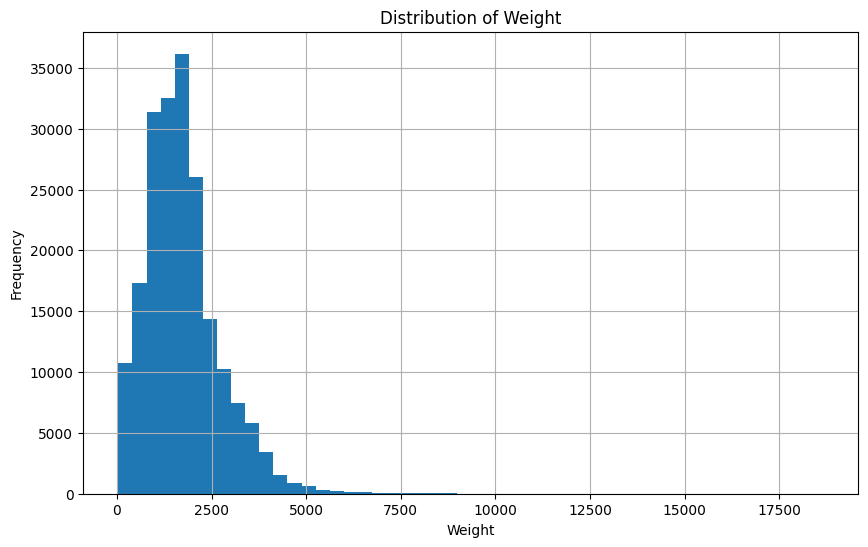

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['weight'].hist(bins=50)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
label_weight_sum = df.groupby('label')['weight'].sum()
percentage = (label_weight_sum / label_weight_sum.sum()) * 100
display(percentage)

label
- 50000.    93.594958
50000+.      6.405042
Name: weight, dtype: float64

In [ ]:
df.columns

Index(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'ow

In [22]:
sdf = df[~((df['state of previous residence']=='Unknown') | (df['state of previous residence']=='Abroad'))].groupby('state of previous residence')['weight'].sum()

In [23]:
len(sdf)

49

In [25]:
import plotly.express as px

# Dictionary to map full state names to 2-letter codes
state_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Convert the Series 'sdf' to a DataFrame
sdf_df = sdf.reset_index()
sdf_df.columns = ['state_name', 'total_weight'] # Rename columns for clarity

# Map full state names to 2-letter codes and filter out non-US states
sdf_df['state_code'] = sdf_df['state_name'].map(state_to_code)
sdf_df = sdf_df.dropna(subset=['state_code']) # Drop rows where state_code couldn't be mapped (e.g., 'Abroad')

# Create the choropleth map
fig = px.choropleth(
    sdf_df,
    locations='state_code', # Use the new state_code column
    locationmode='USA-states',
    color='total_weight',
    scope='usa',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Distribution of U.S. State of Previous Residence'
)
fig.show()

In [ ]:
df_filtered_migration = df[(df['migration code-change in msa'].notna() &
                           df['migration code-change in reg'].notna() &
                           df['migration code-move within reg'].notna() &
                           df['migration prev res in sunbelt'].notna())]
num_rows_filtered = len(df_filtered_migration)
print(f"Number of rows with non-null migration data: {num_rows_filtered}")

Number of rows with non-null migration data: 99827


In [ ]:
df['migration code-change in msa'].value_counts(dropna=False)

migration code-change in msa
NaN                 99696
Nonmover            82538
MSA to MSA          10601
NonMSA to nonMSA     2811
Not in universe      1516
MSA to nonMSA         790
NonMSA to MSA         615
Abroad to MSA         453
Not identifiable      430
Abroad to nonMSA       73
Name: count, dtype: int64

In [ ]:
df_filtered_migration['region of previous residence'].value_counts(dropna=False)

region of previous residence
Not in universe    84054
South               4889
West                4074
Midwest             3575
Northeast           2705
Abroad               530
Name: count, dtype: int64

In [ ]:
df['region of previous residence'].value_counts(dropna=False)

region of previous residence
Not in universe    183750
South                4889
West                 4074
Midwest              3575
Northeast            2705
Abroad                530
Name: count, dtype: int64

In [ ]:
df[df['region of previous residence']=='Not in universe'].head()

age  class of worker  detailed industry recode  detailed occupation recode  \
0   73  Not in universe                         0                           0   
2   18  Not in universe                         0                           0   
3    9  Not in universe                         0                           0   
4   10  Not in universe                         0                           0   
5   48          Private                        40                          10   

                    education  wage per hour enroll in edu inst last wk  \
0        High school graduate              0            Not in universe   
2                  10th grade              0                High school   
3                    Children              0            Not in universe   
4                    Children              0            Not in universe   
5  Some college but no degree           1200            Not in universe   

                      marital stat          major industry code  \
0                          Widowed  Not in universe or children   
2                    Never married  Not in universe or children   
3                    Never married  Not in universe or children   
4                    Never married  Not in universe or children   
5  Married-civilian spouse present                Entertainment   

    major occupation code                         race hispanic origin  \
0         Not in universe                        White       All other   
2         Not in universe    Asian or Pacific Islander       All other   
3         Not in universe                        White       All other   
4         Not in universe                        White       All other   
5  Professional specialty  Amer Indian Aleut or Eskimo       All other   

      sex member of a labor union reason for unemployment  \
0  Female         Not in universe         Not in universe   
2  Female         Not in universe         Not in universe   
3  Female         Not in universe         Not in universe   
4  Female         Not in universe         Not in universe   
5  Female                      No         Not in universe   

  full or part time employment stat  capital gains  capital losses  \
0                Not in labor force              0               0   
2                Not in labor force              0               0   
3          Children or Armed Forces              0               0   
4          Children or Armed Forces              0               0   
5               Full-time schedules              0               0   

   dividends from stocks       tax filer stat region of previous residence  \
0                      0             Nonfiler              Not in universe   
2                      0             Nonfiler              Not in universe   
3                      0             Nonfiler              Not in universe   
4                      0             Nonfiler              Not in universe   
5                      0  Joint both under 65              Not in universe   

  state of previous residence        detailed household and family stat  \
0             Not in universe  Other Rel 18+ ever marr not in subfamily   
2             Not in universe   Child 18+ never marr Not in a subfamily   
3             Not in universe     Child <18 never marr not in subfamily   
4             Not in universe     Child <18 never marr not in subfamily   
5             Not in universe                     Spouse of householder   

  detailed household summary in household   weight  \
0           Other relative of householder  1700.09   
2                       Child 18 or older   991.95   
3            Child under 18 never married  1758.14   
4            Child under 18 never married  1069.16   
5                   Spouse of householder   162.61   

  migration code-change in msa migration code-change in reg  \
0                          NaN                          NaN   
2                          NaN                          Na

# BIVARIATE

In [ ]:
df.columns

Index(['age', 'class of worker', 'detailed industry recode',
       'detailed occupation recode', 'education', 'wage per hour',
       'enroll in edu inst last wk', 'marital stat', 'major industry code',
       'major occupation code', 'race', 'hispanic origin', 'sex',
       'member of a labor union', 'reason for unemployment',
       'full or part time employment stat', 'capital gains', 'capital losses',
       'dividends from stocks', 'tax filer stat',
       'region of previous residence', 'state of previous residence',
       'detailed household and family stat',
       'detailed household summary in household', 'weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'ow

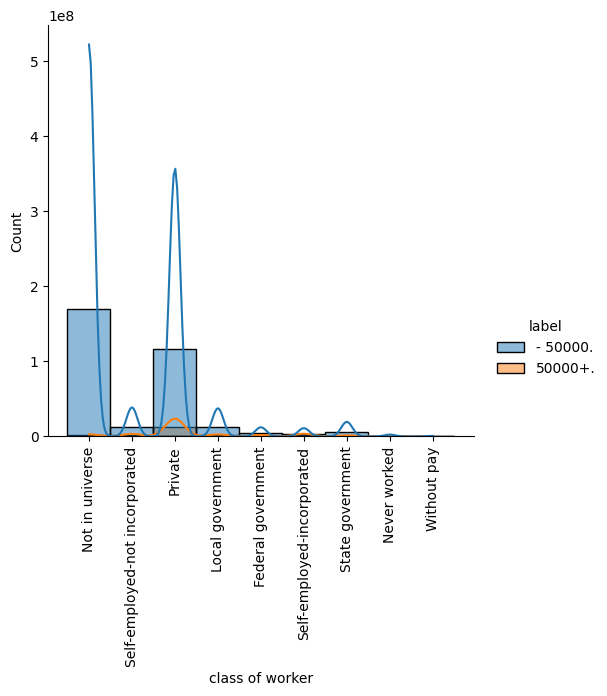

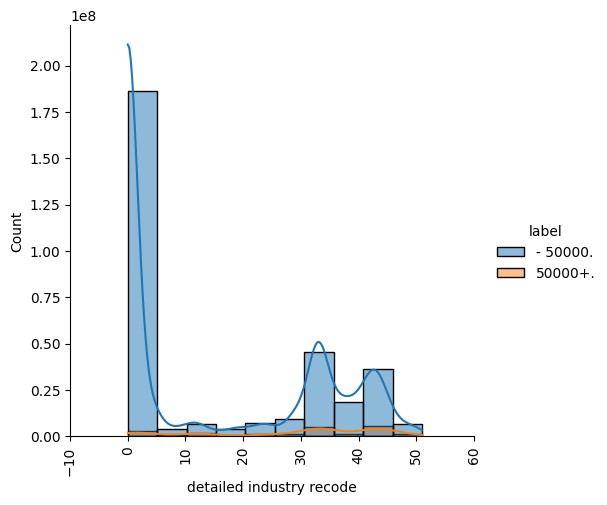

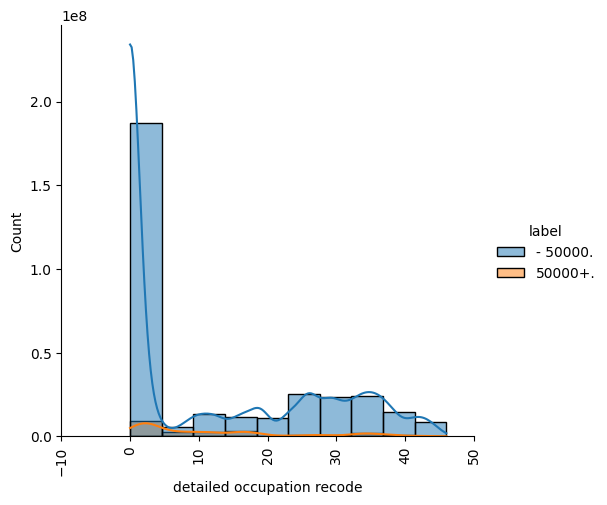

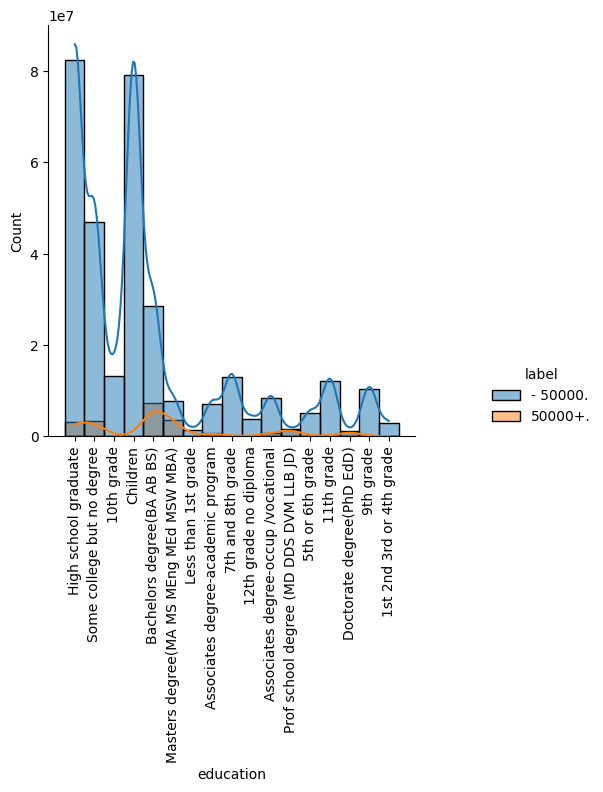

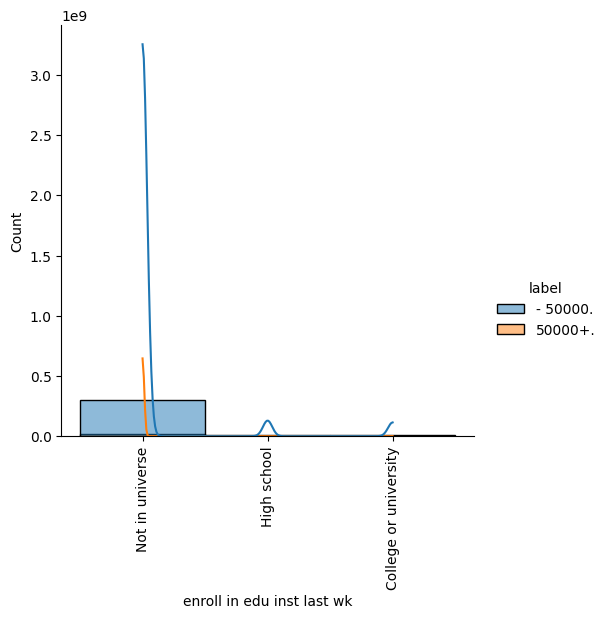

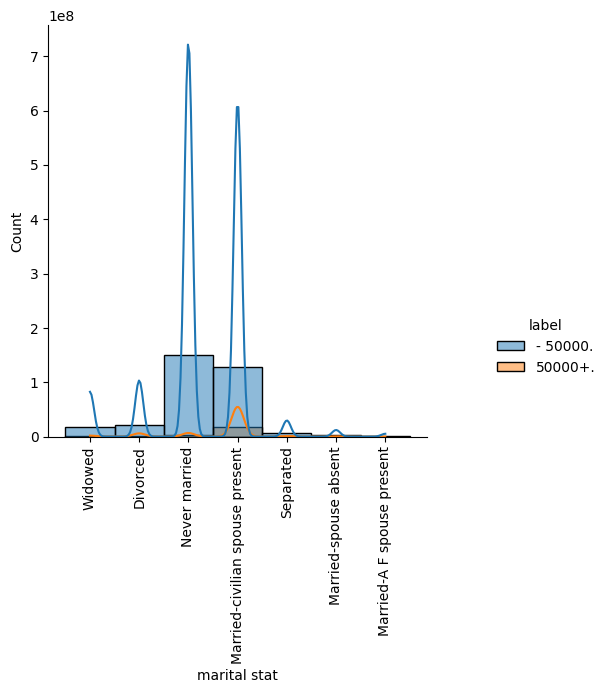

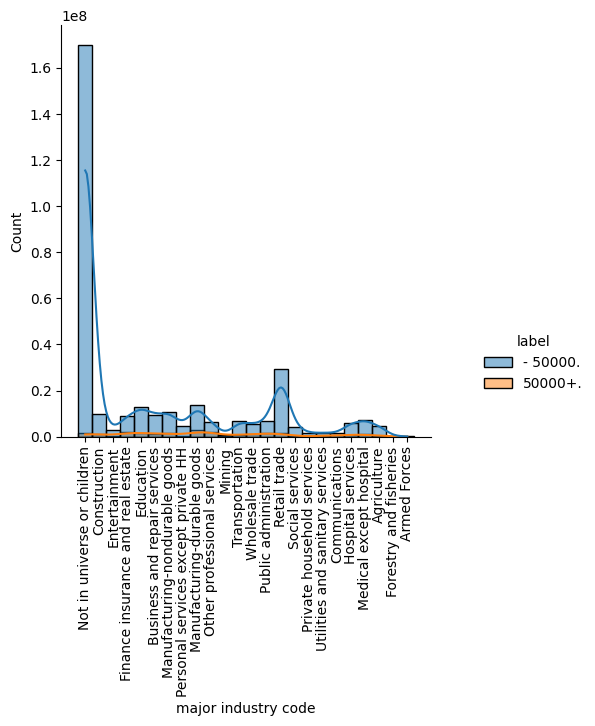

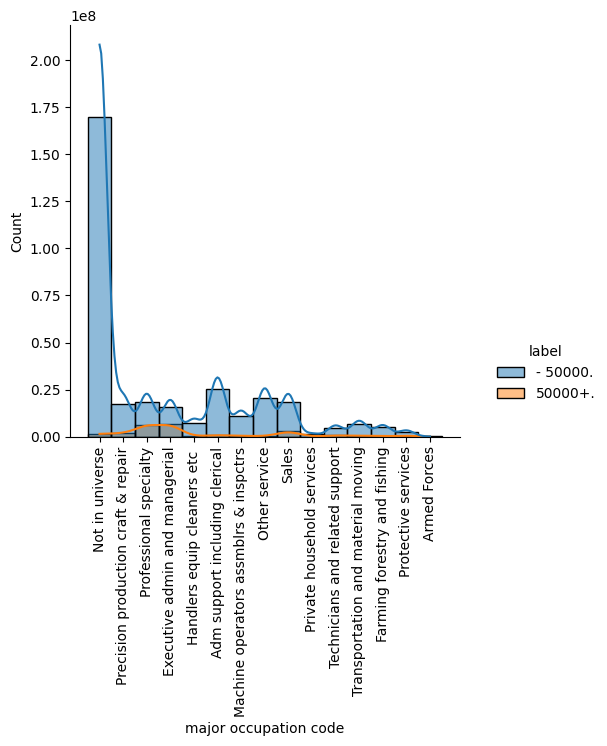

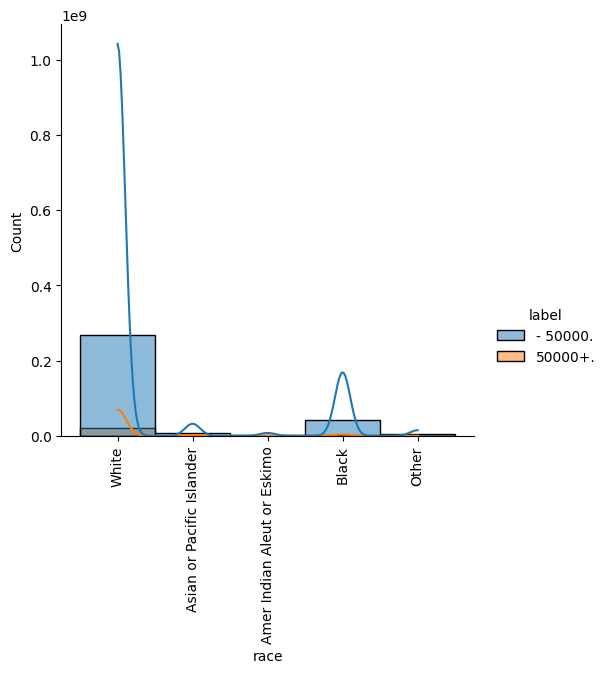

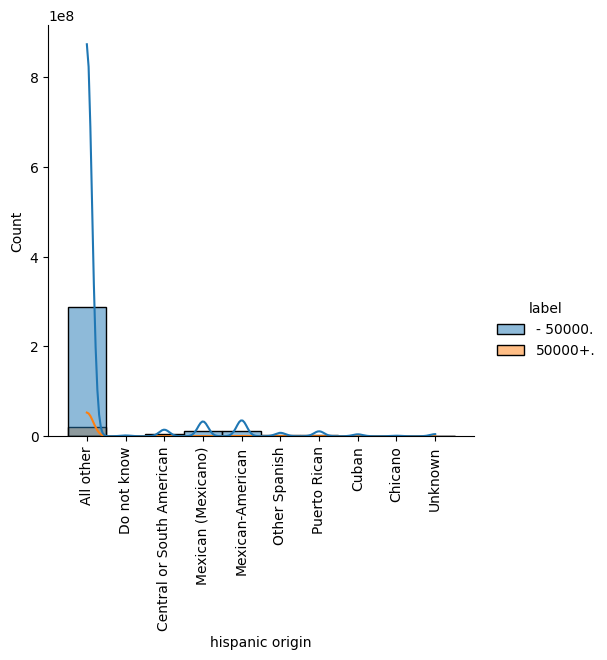

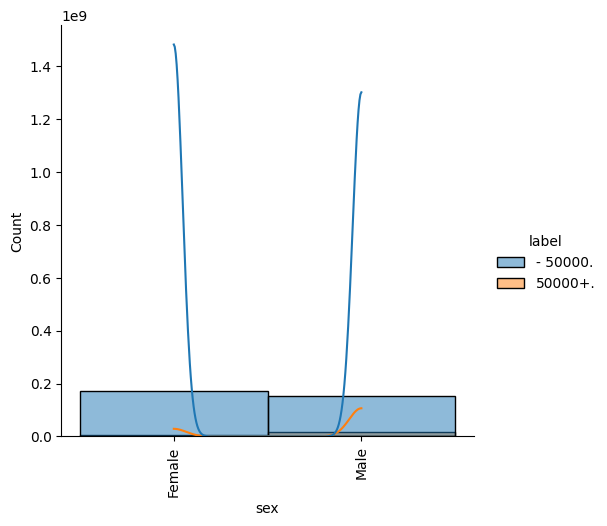

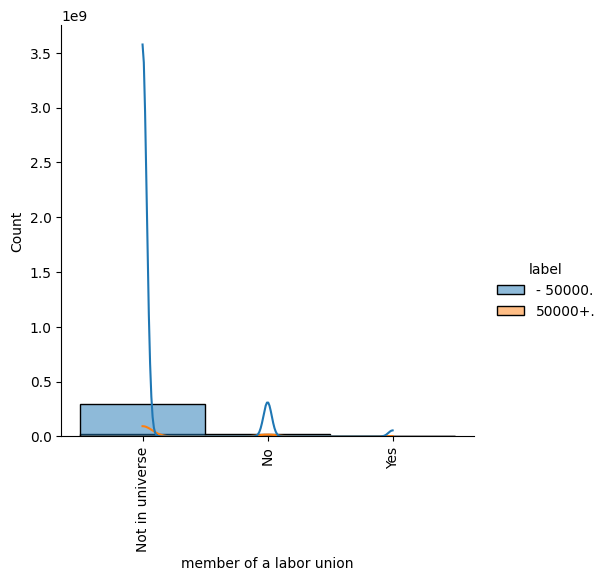

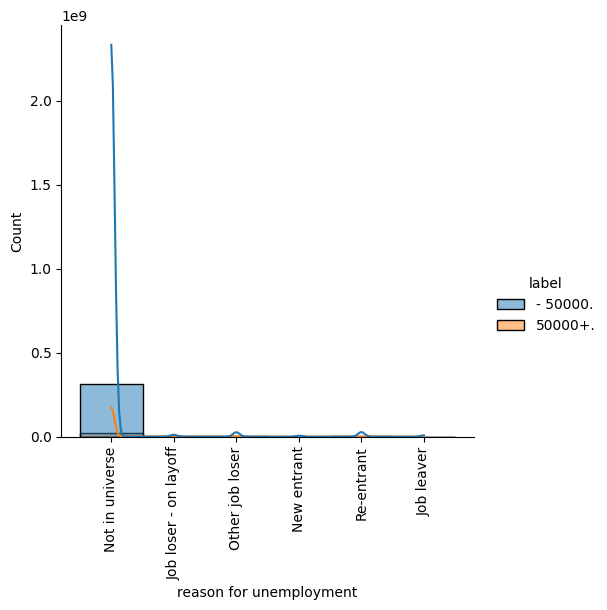

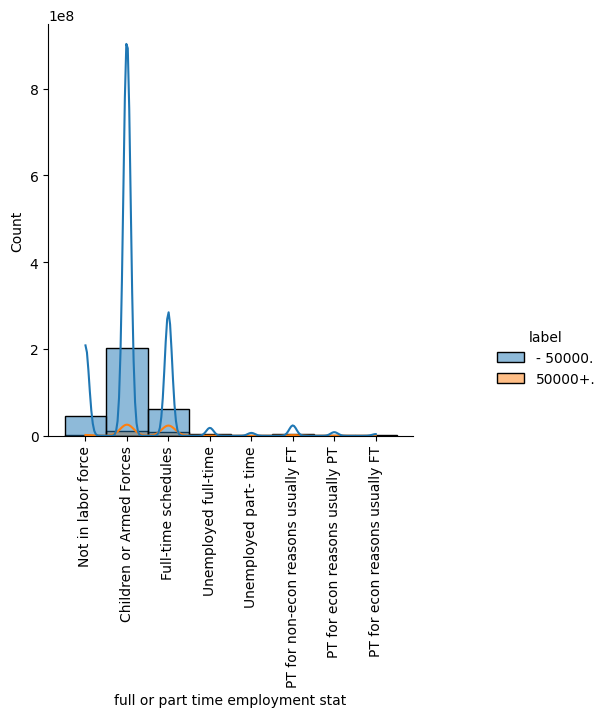

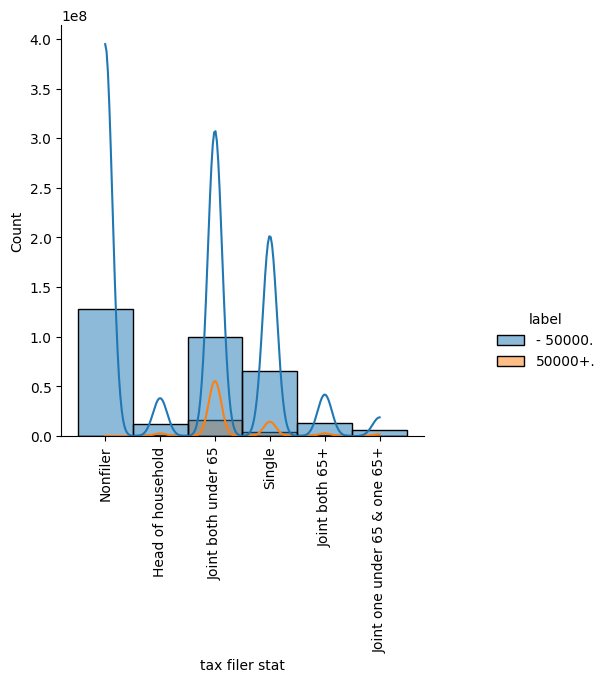

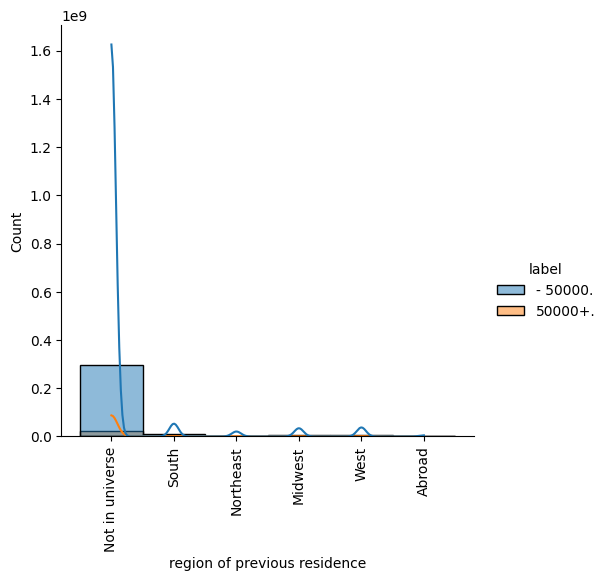

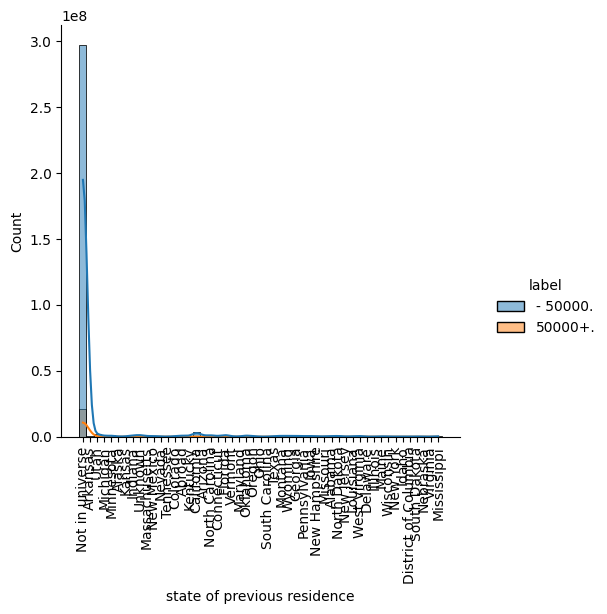

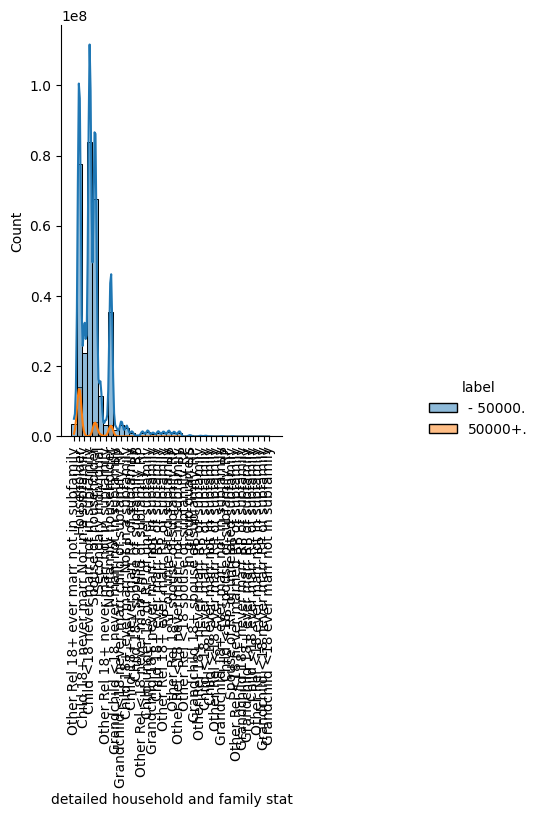

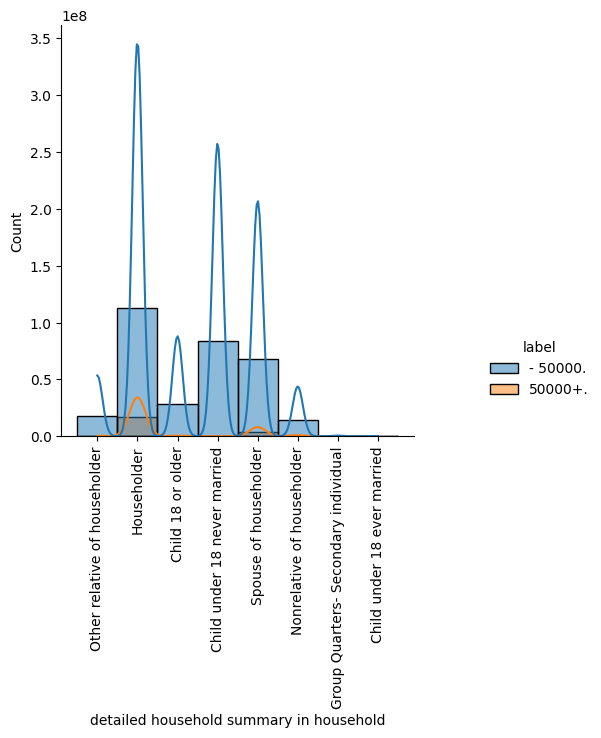

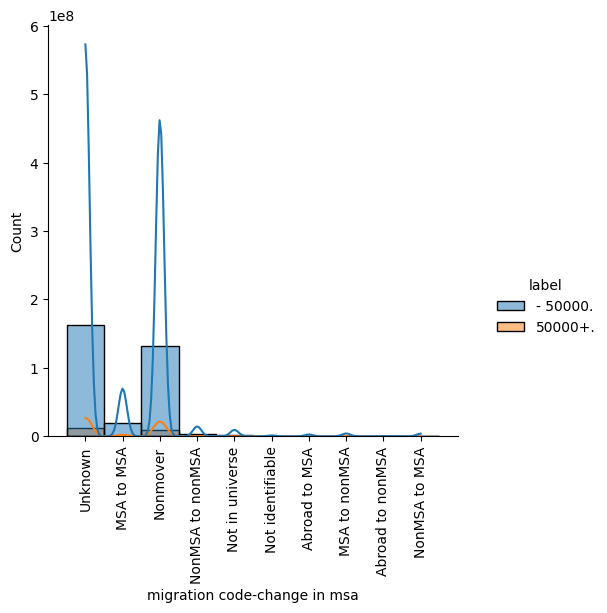

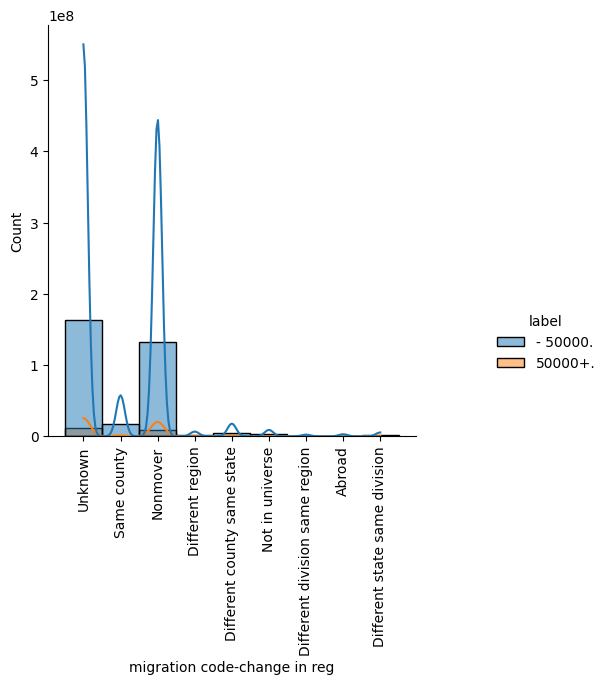

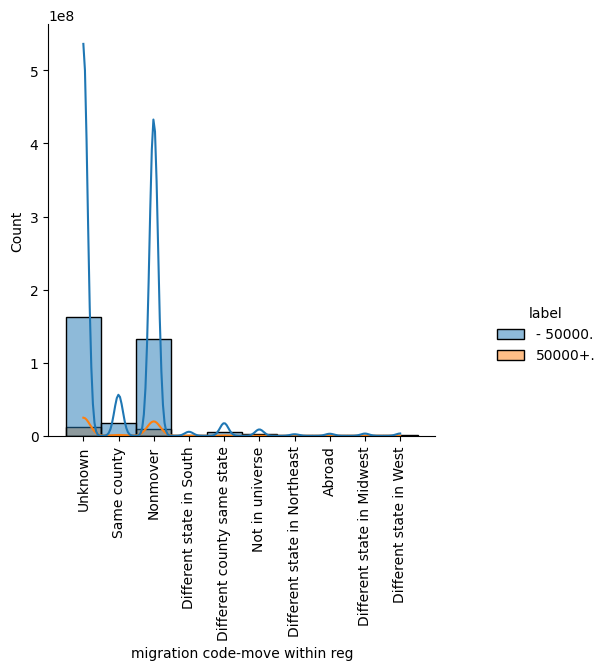

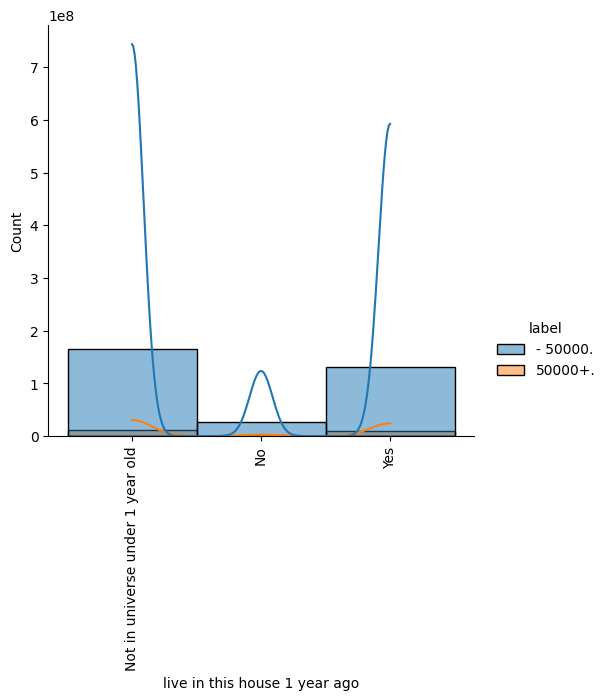

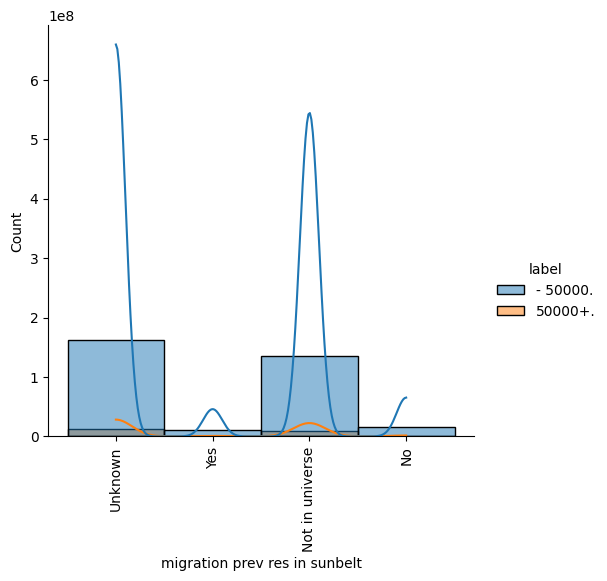

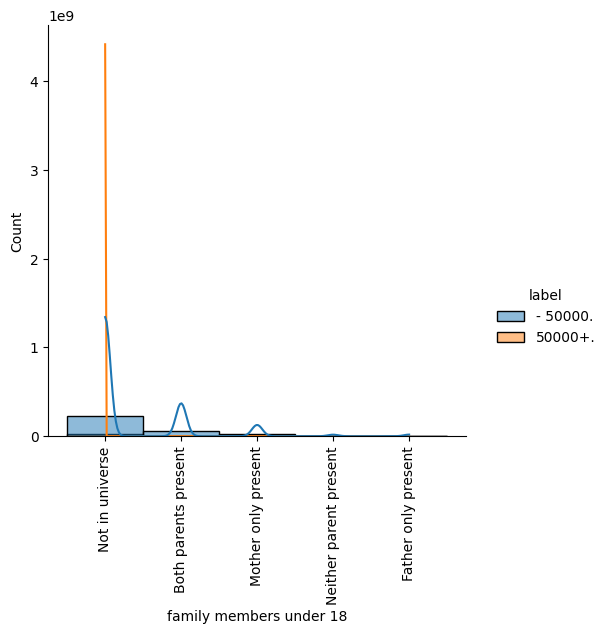

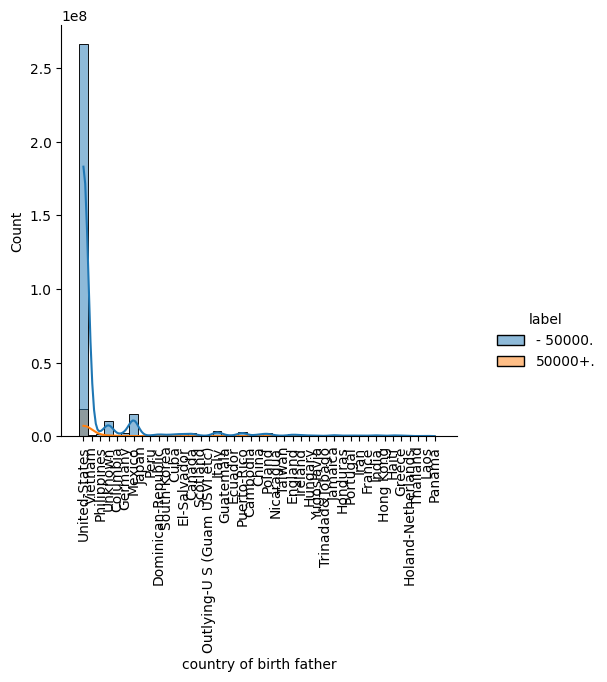

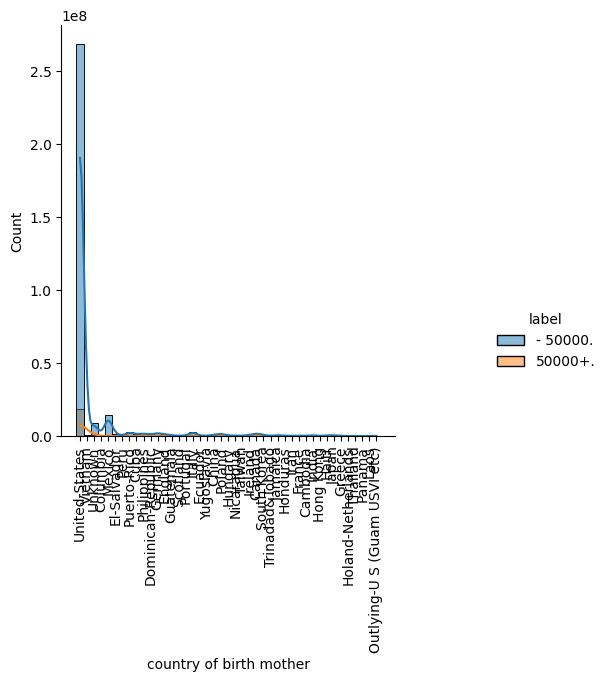

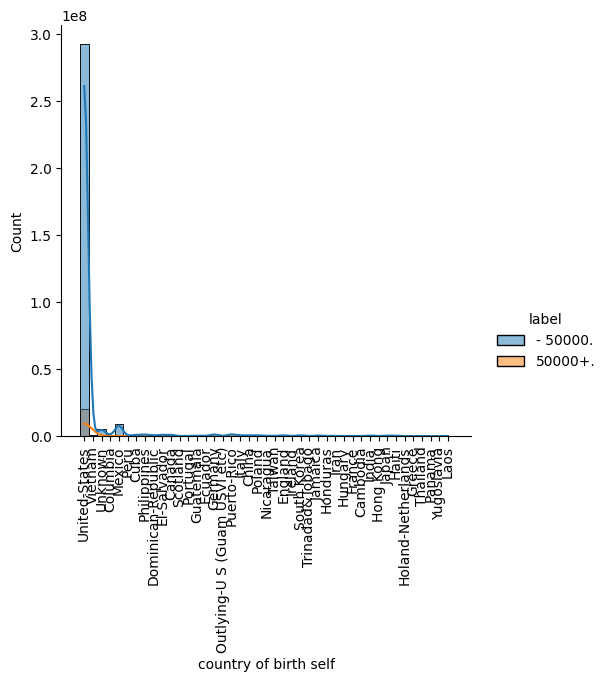

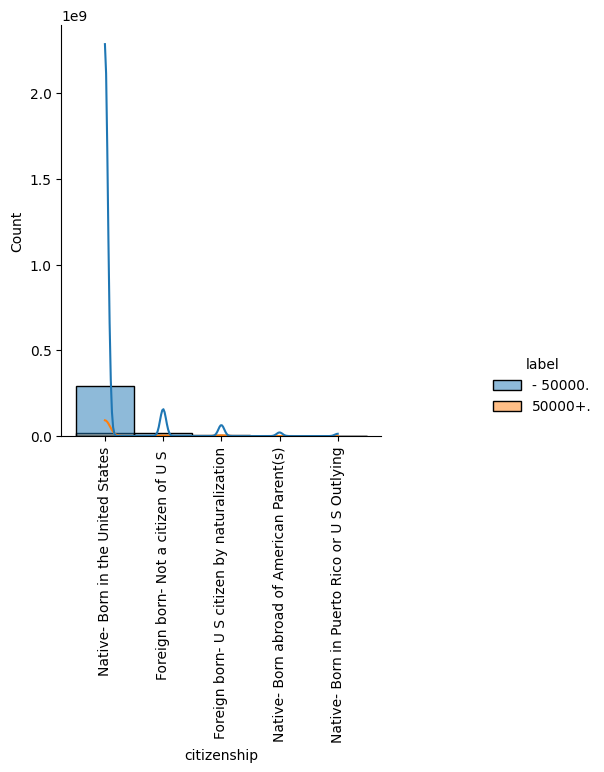

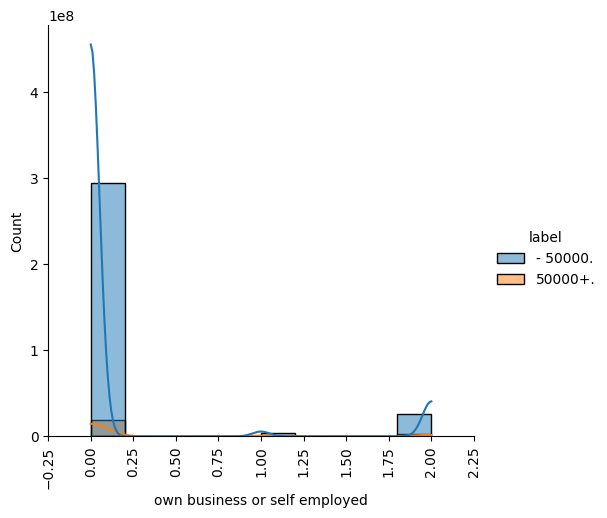

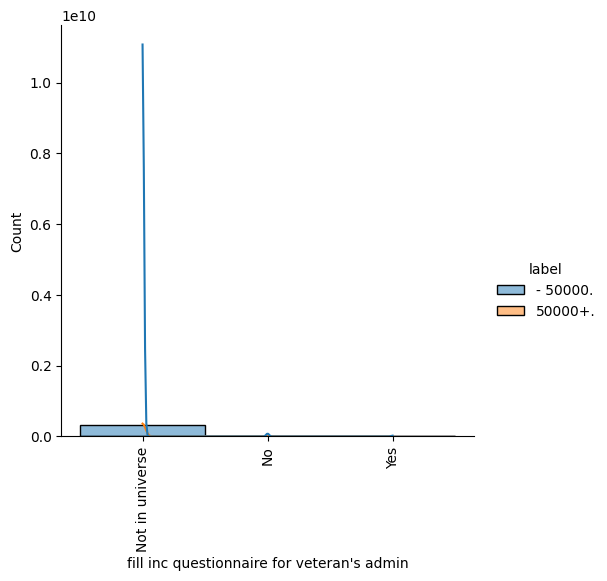

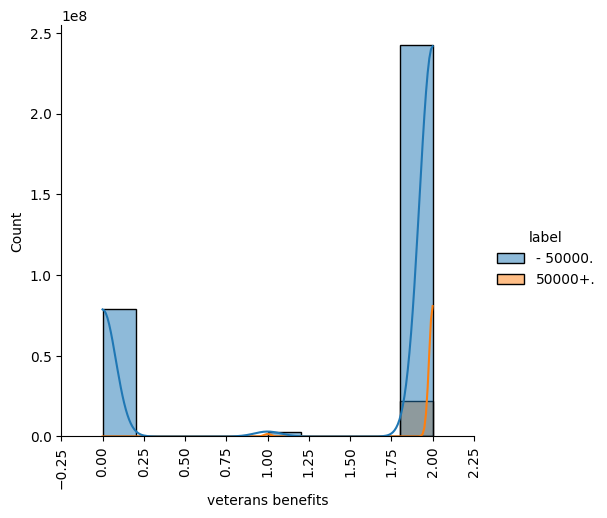

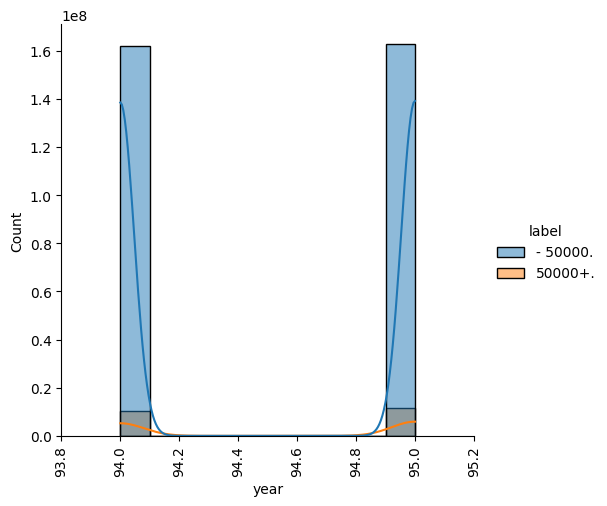

In [ ]:
for i in categorical_columns:
  a = sns.displot(
    data=df, x=i, hue="label",
    kde = True, weights = df['weight']
  )
  a.set_xticklabels(rotation=90)
  plt.show()

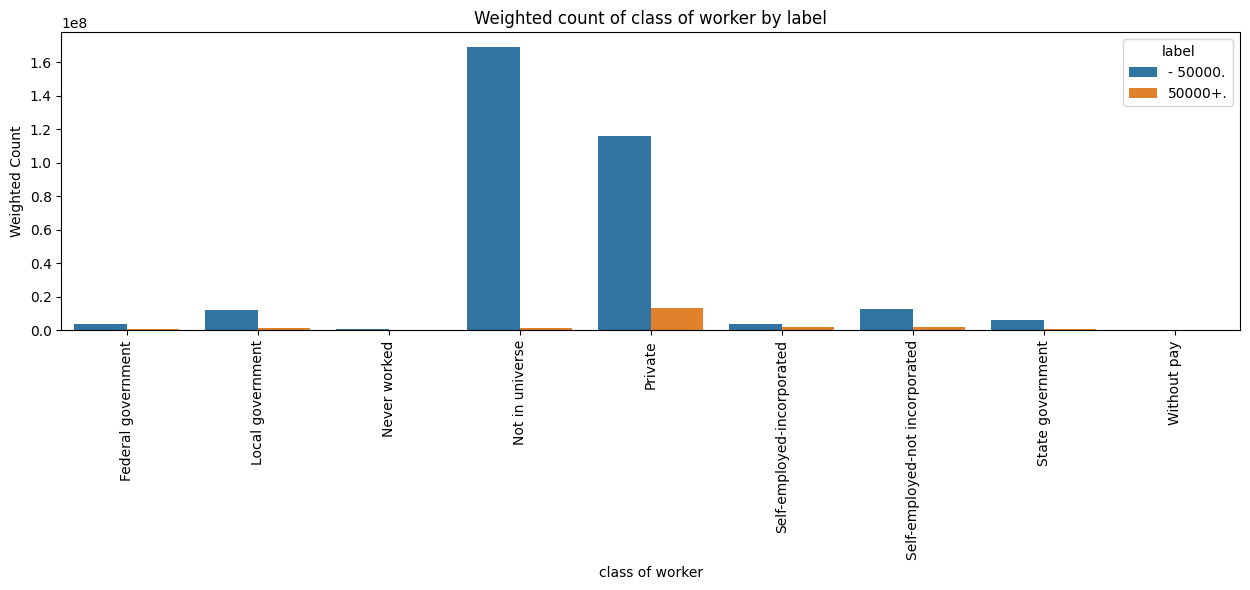

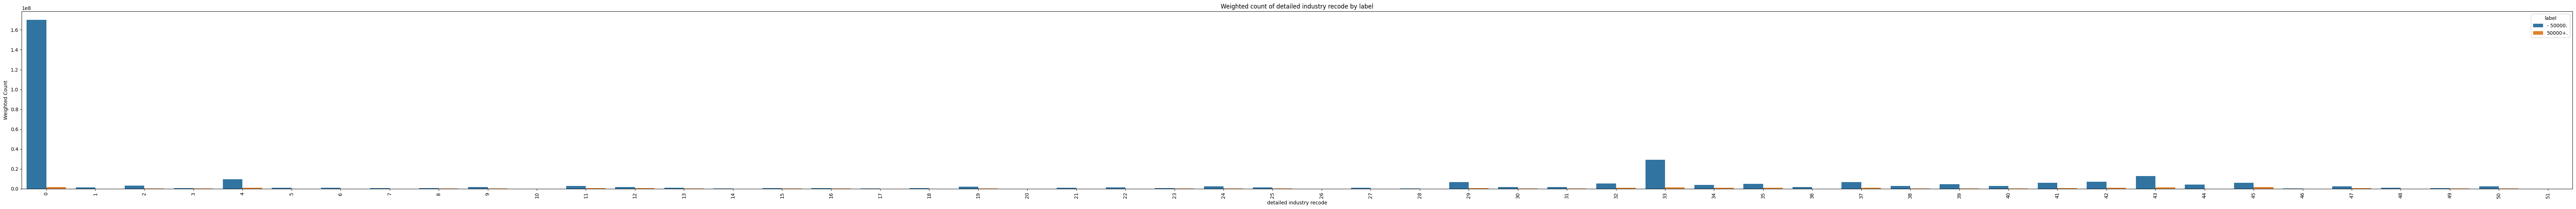

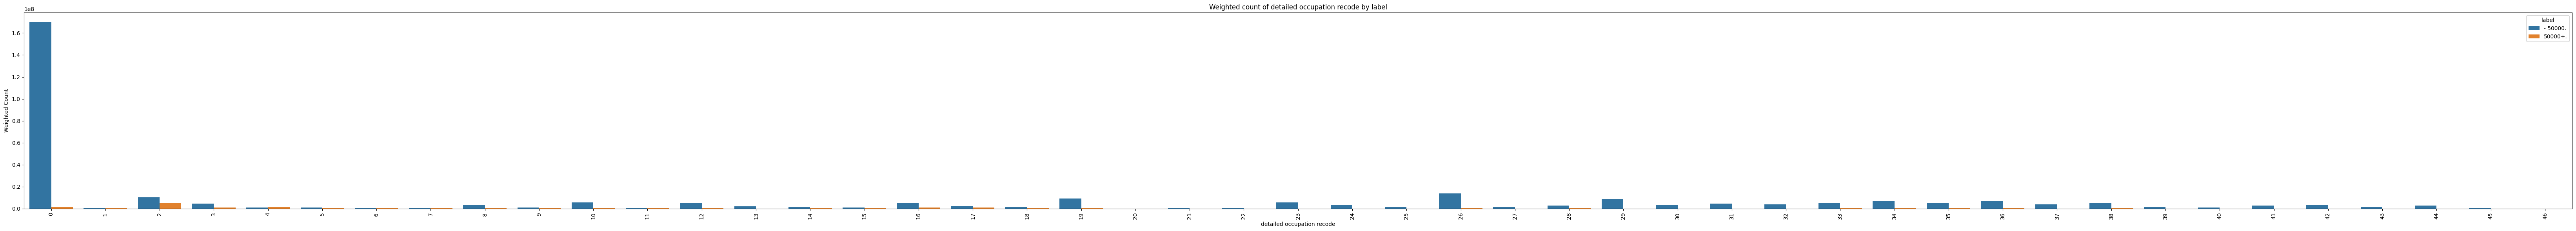

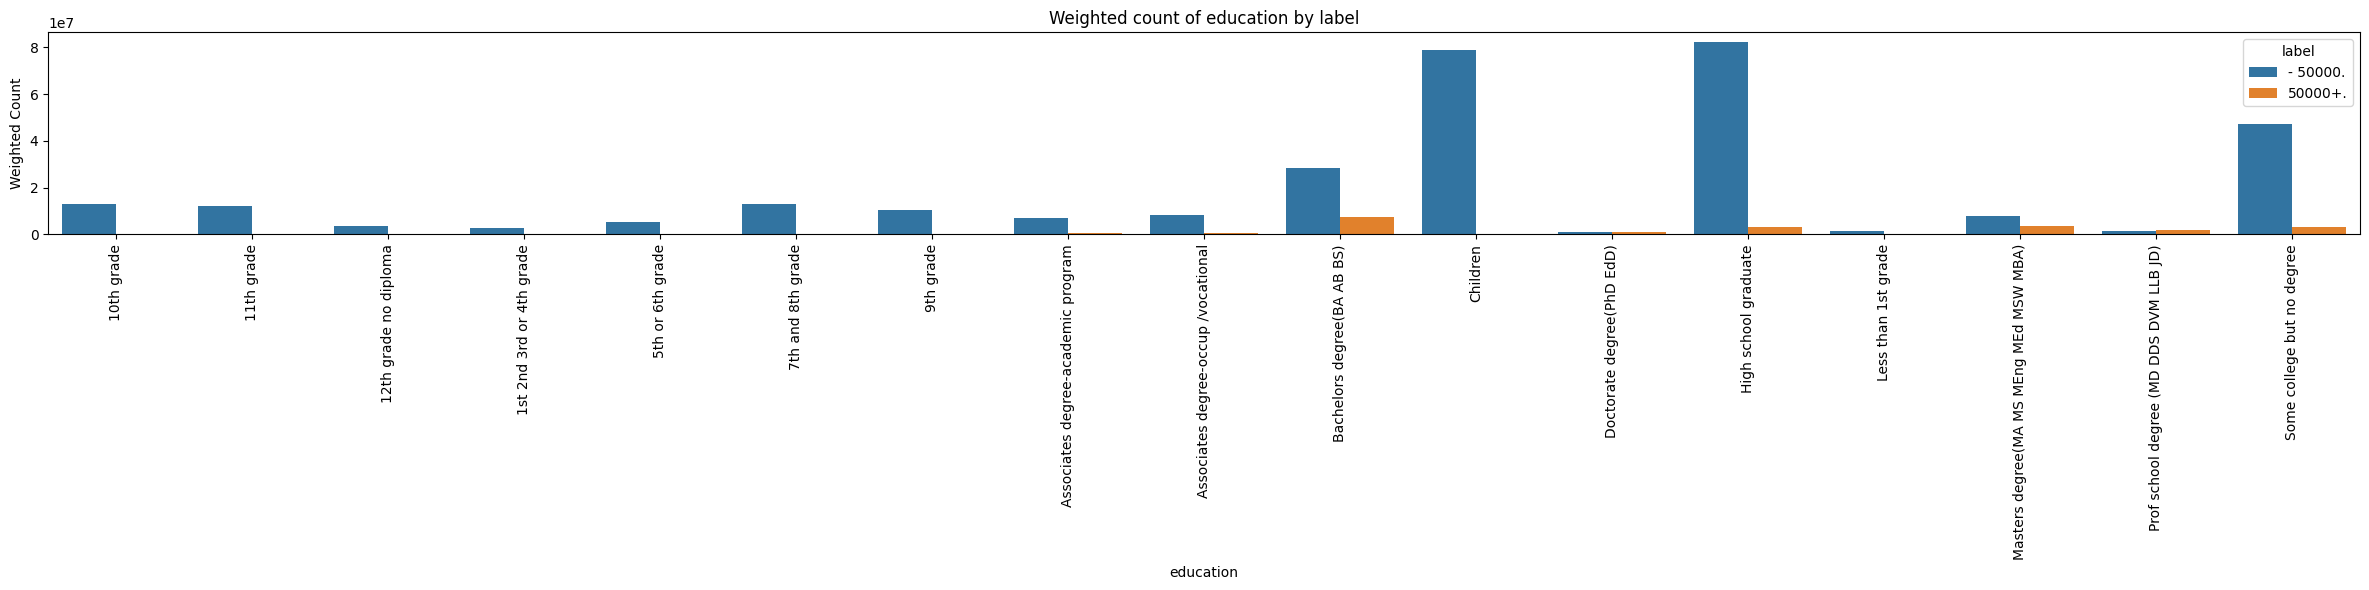

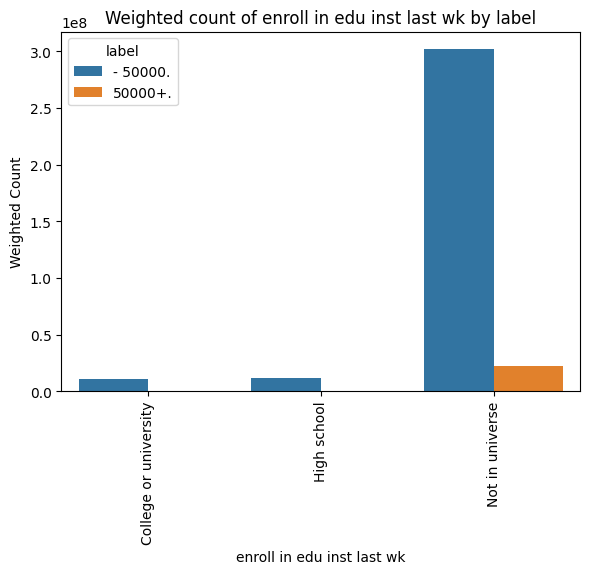

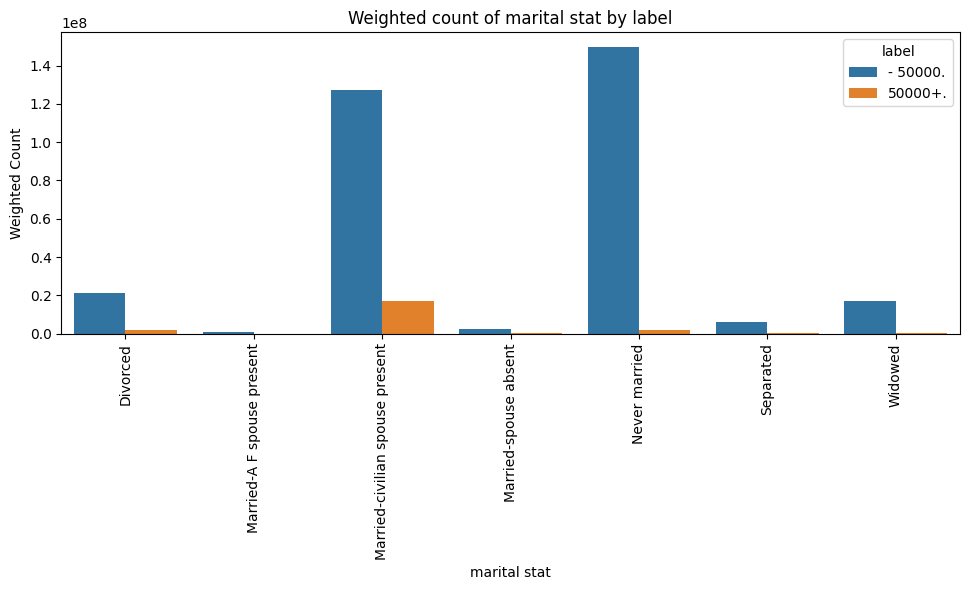

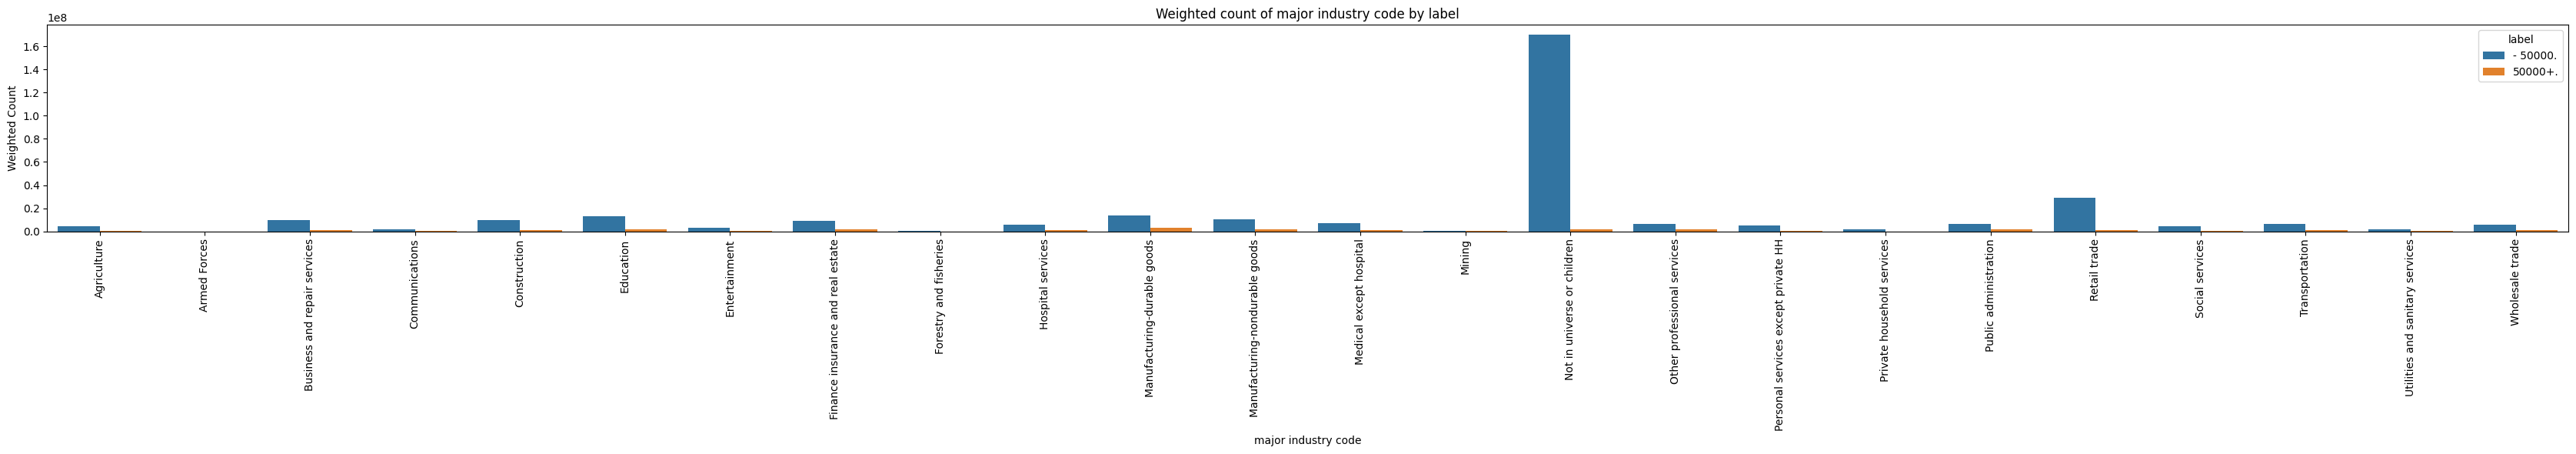

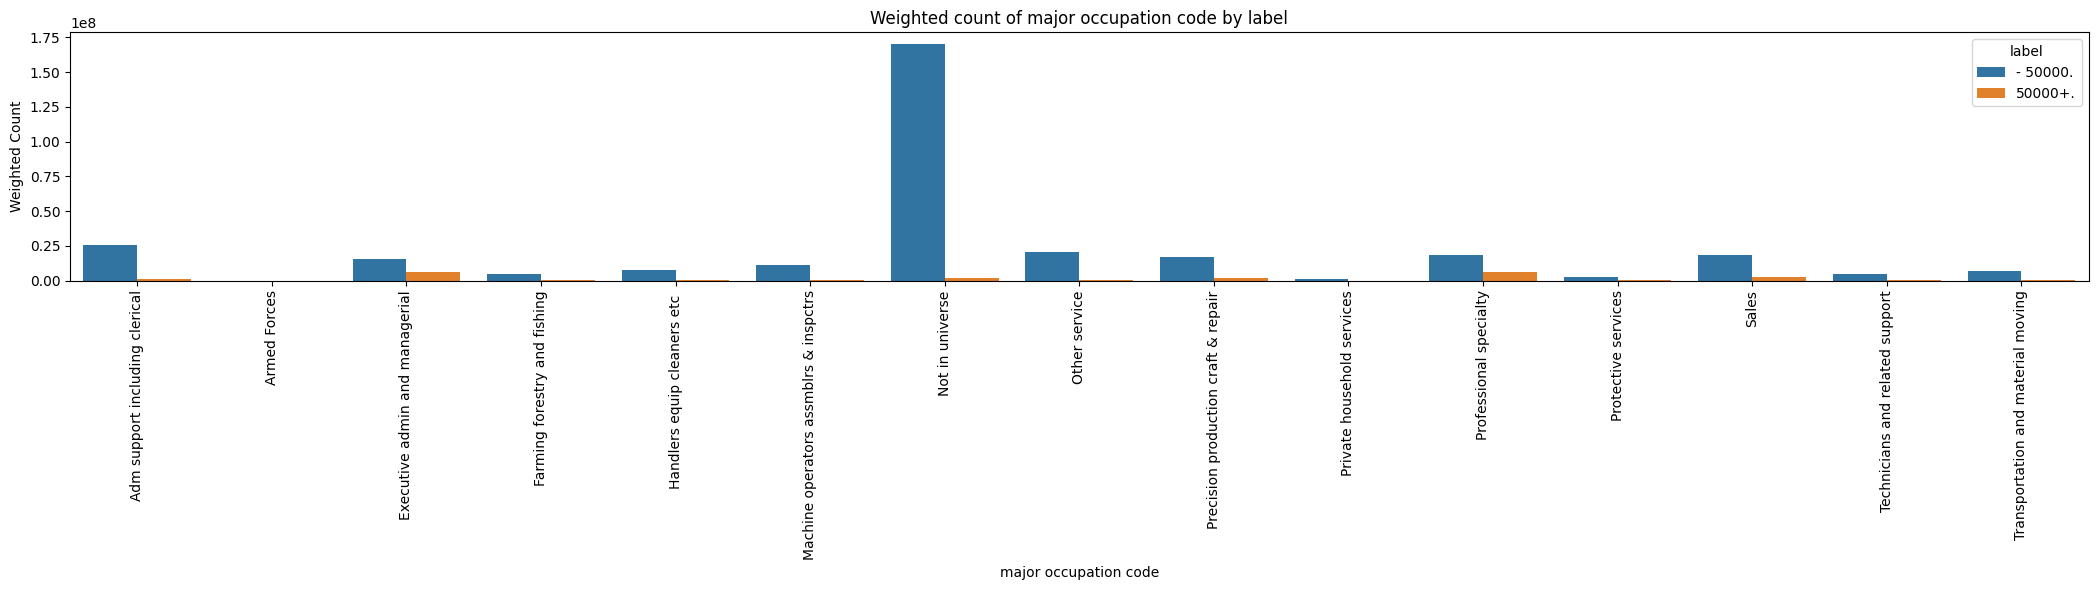

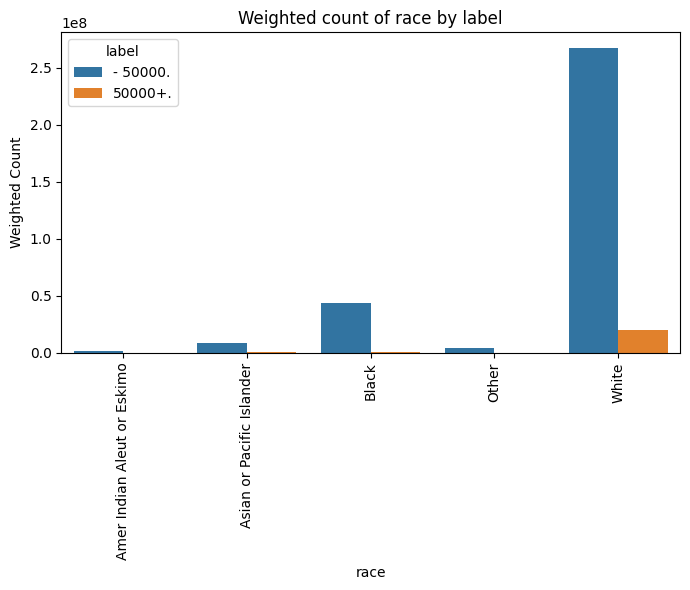

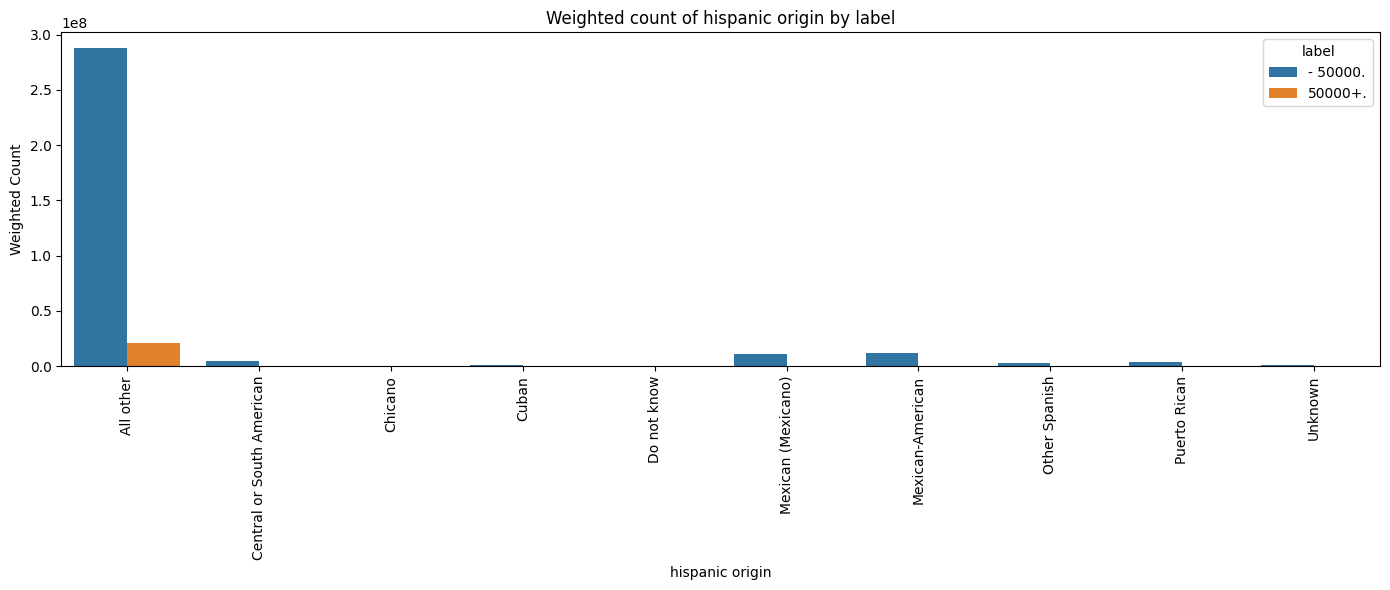

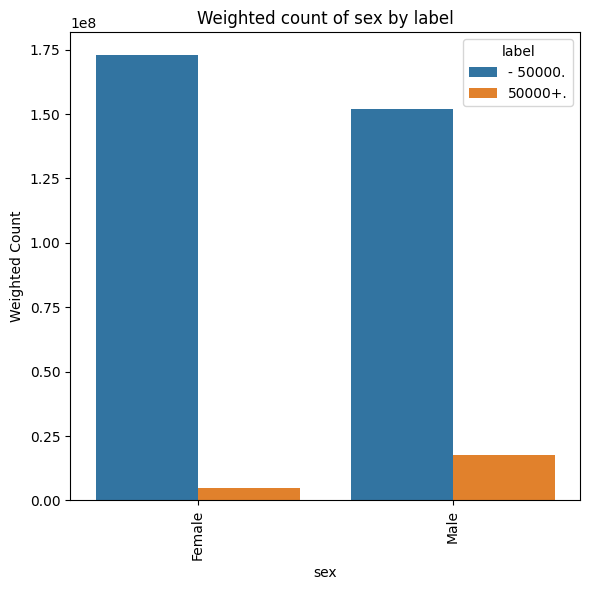

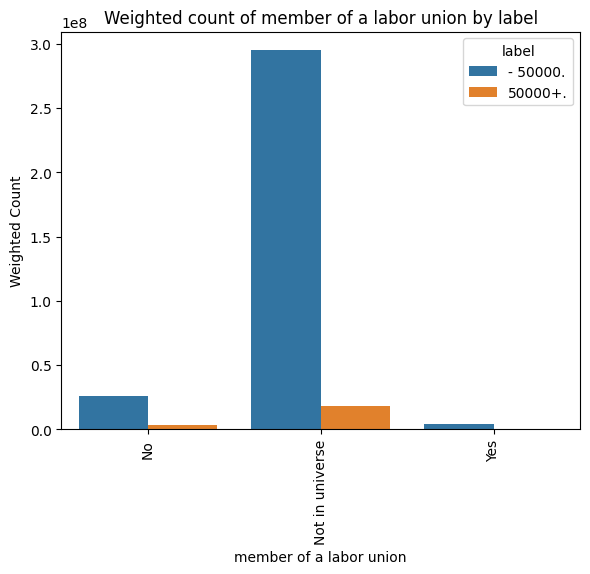

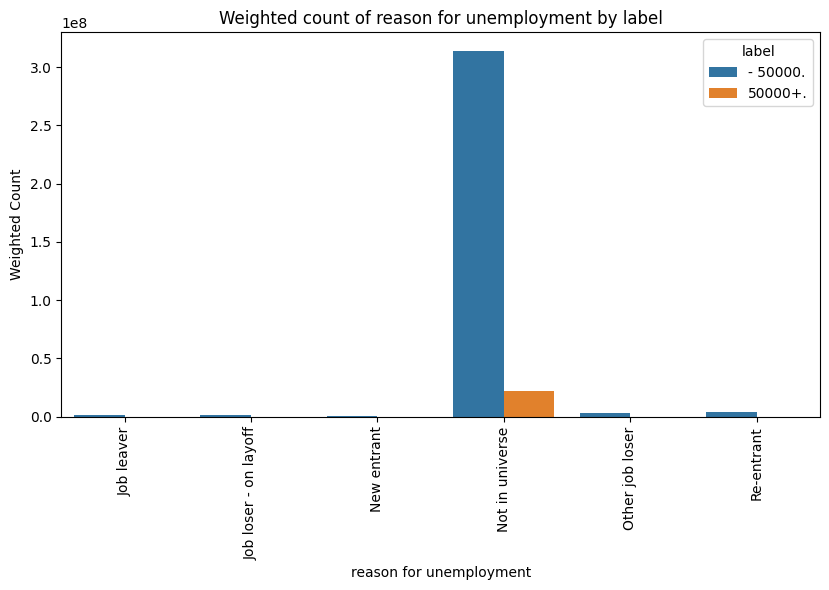

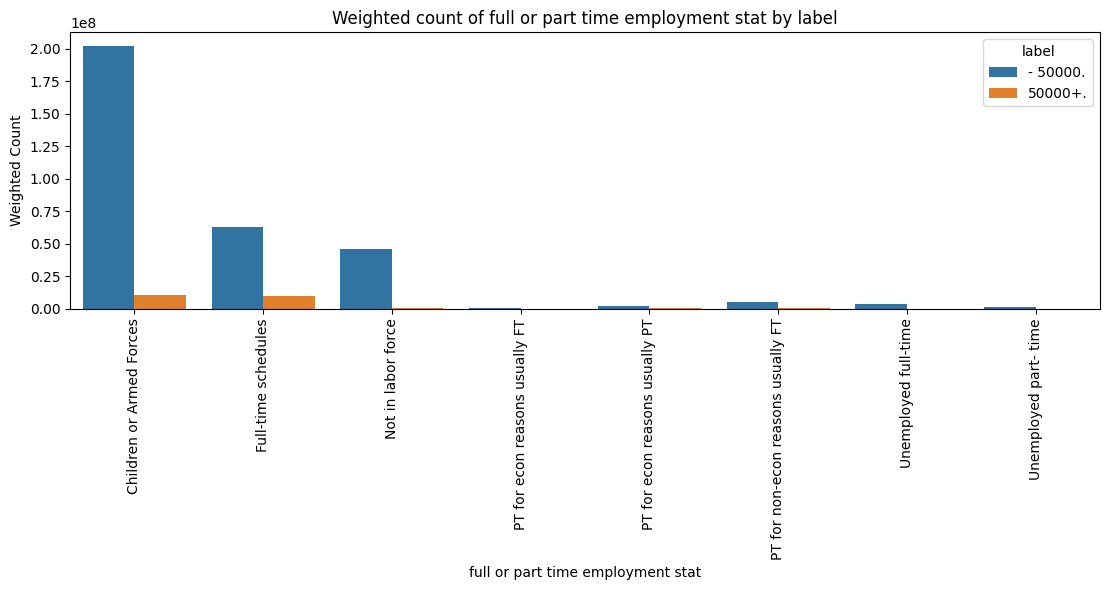

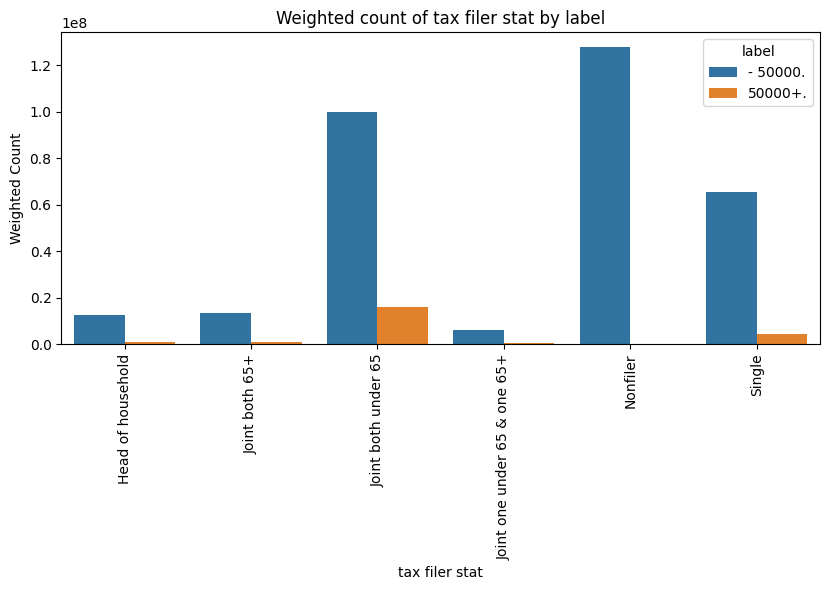

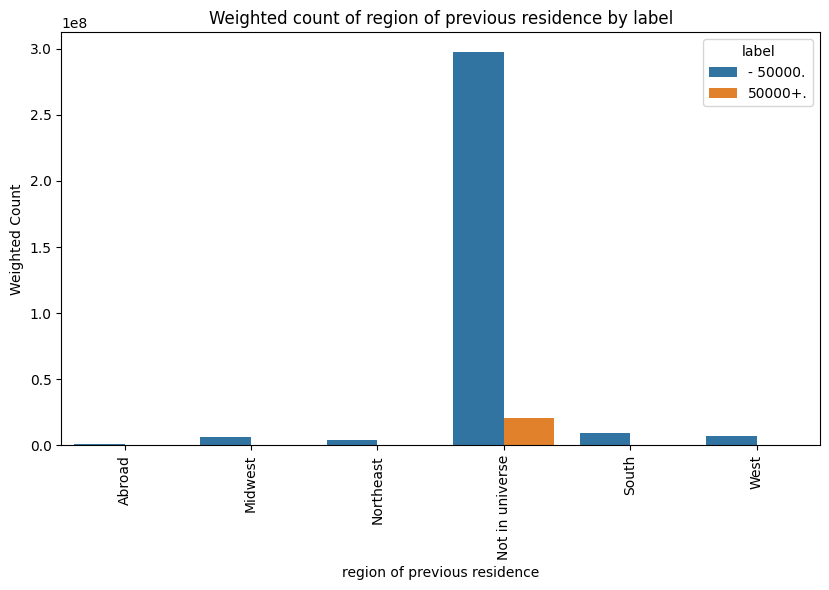

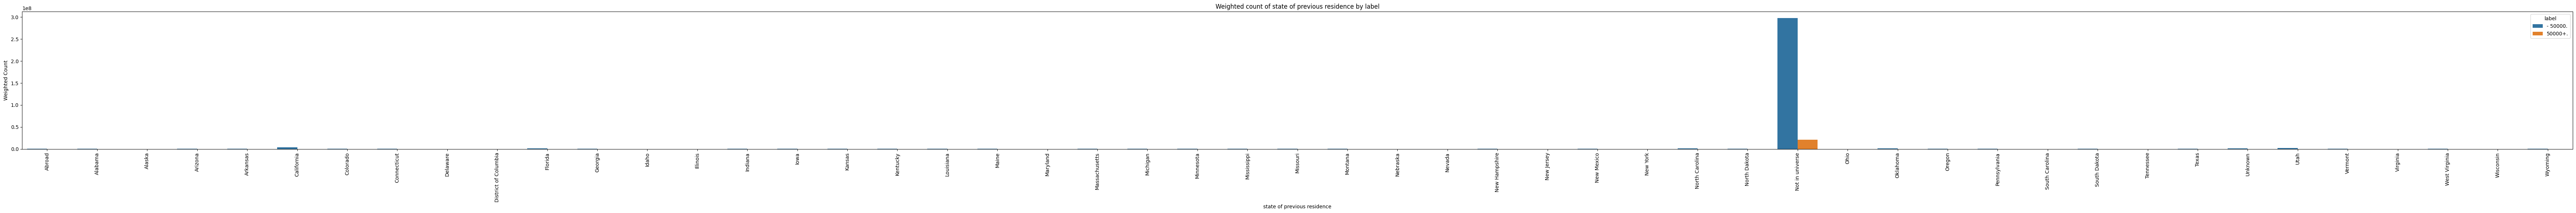

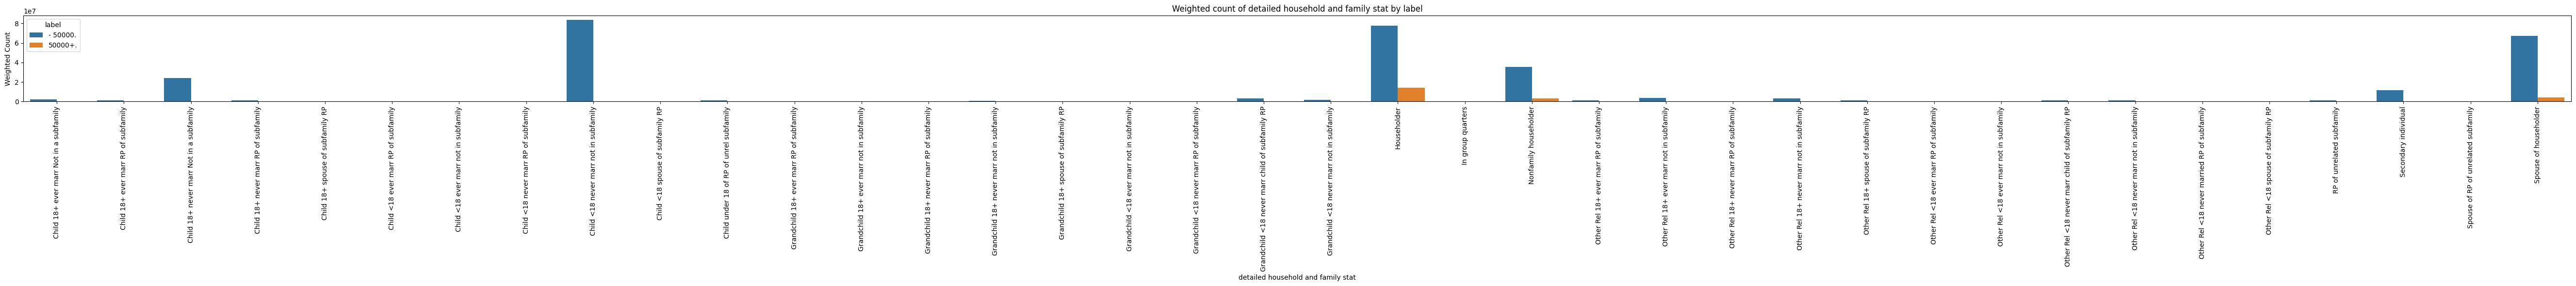

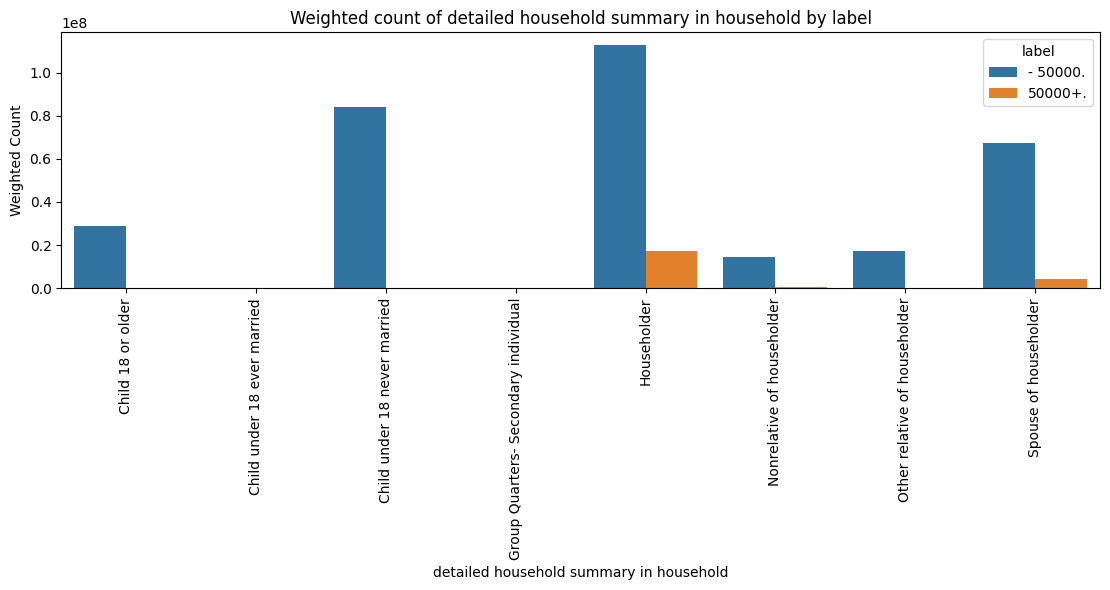

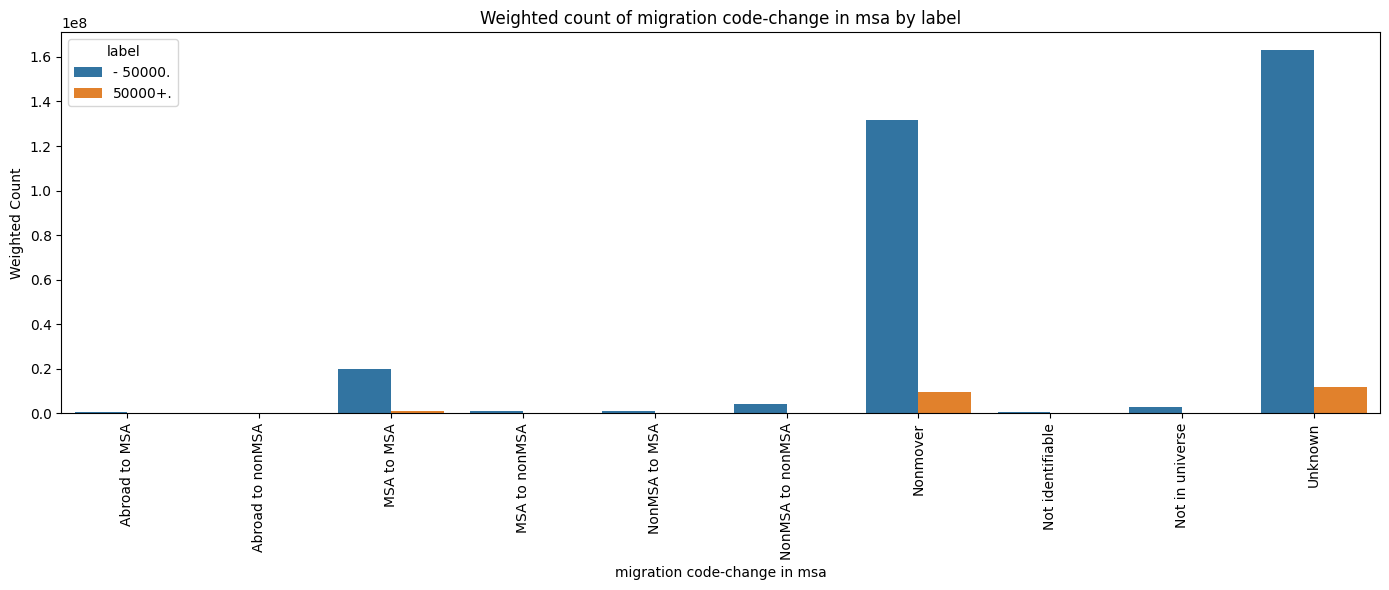

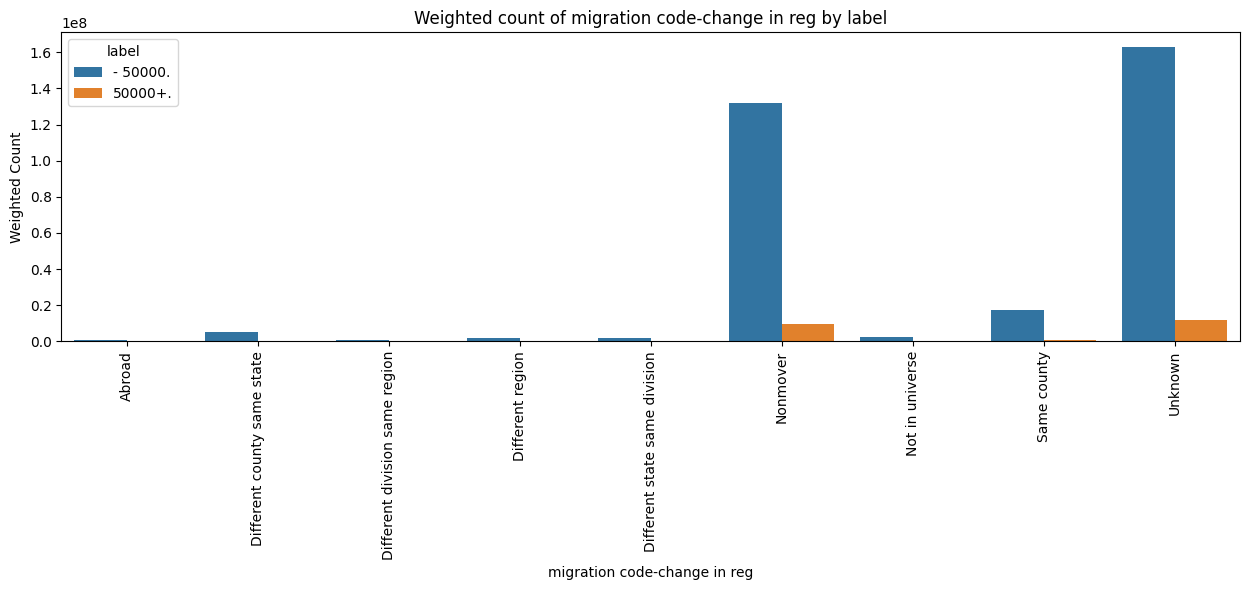

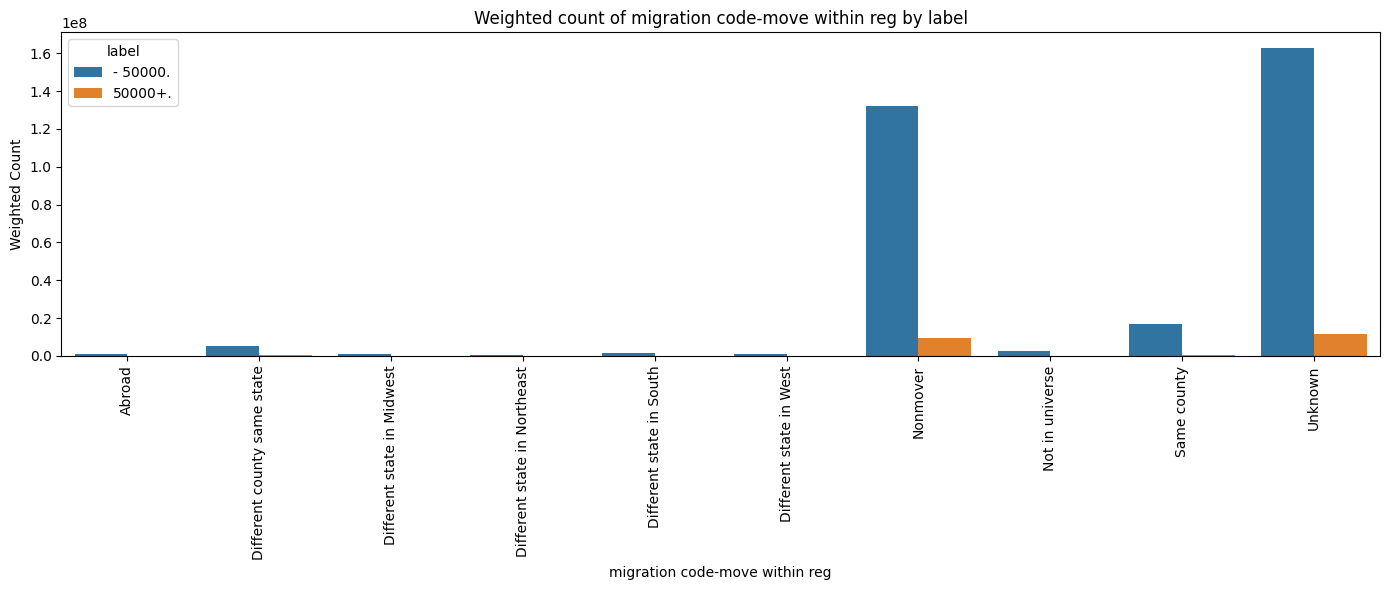

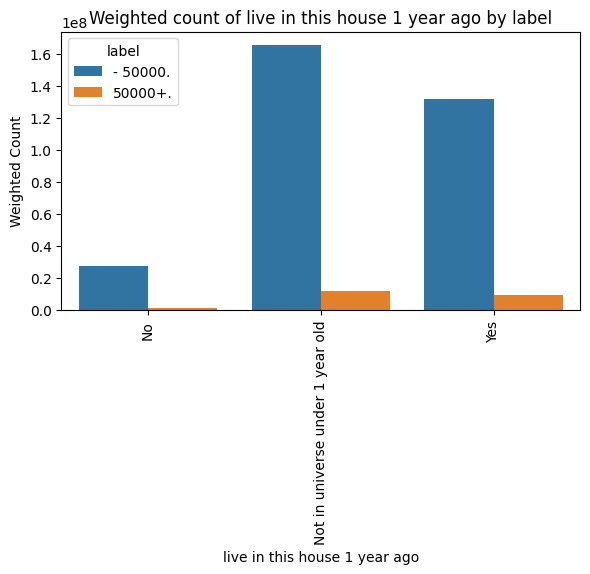

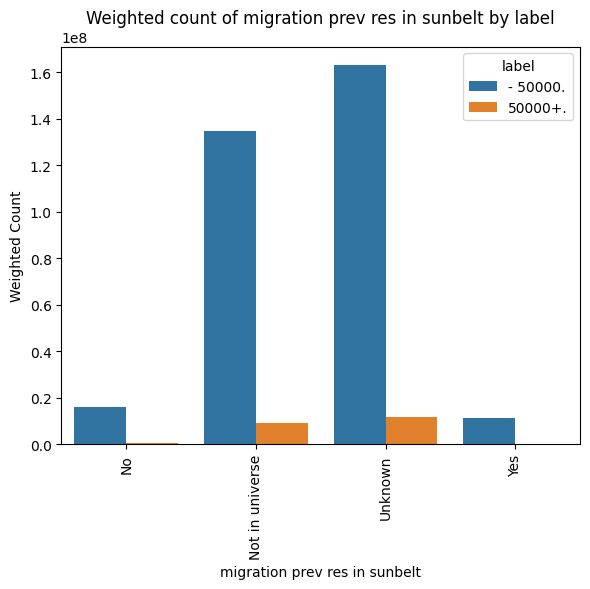

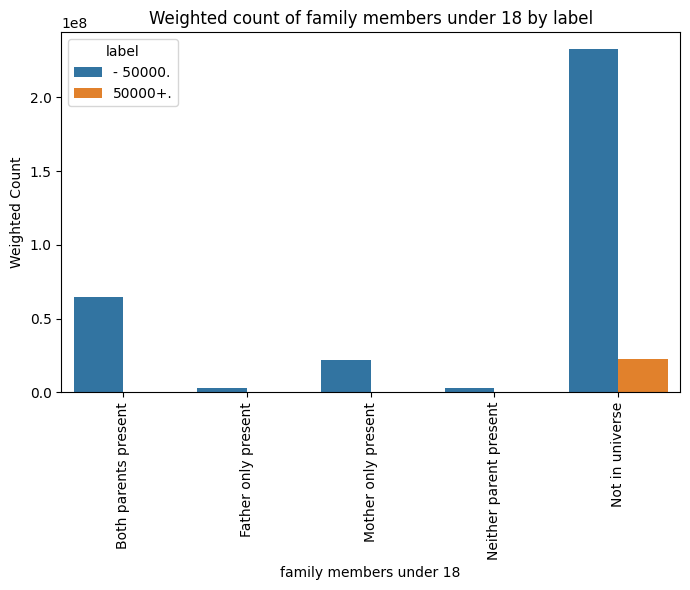

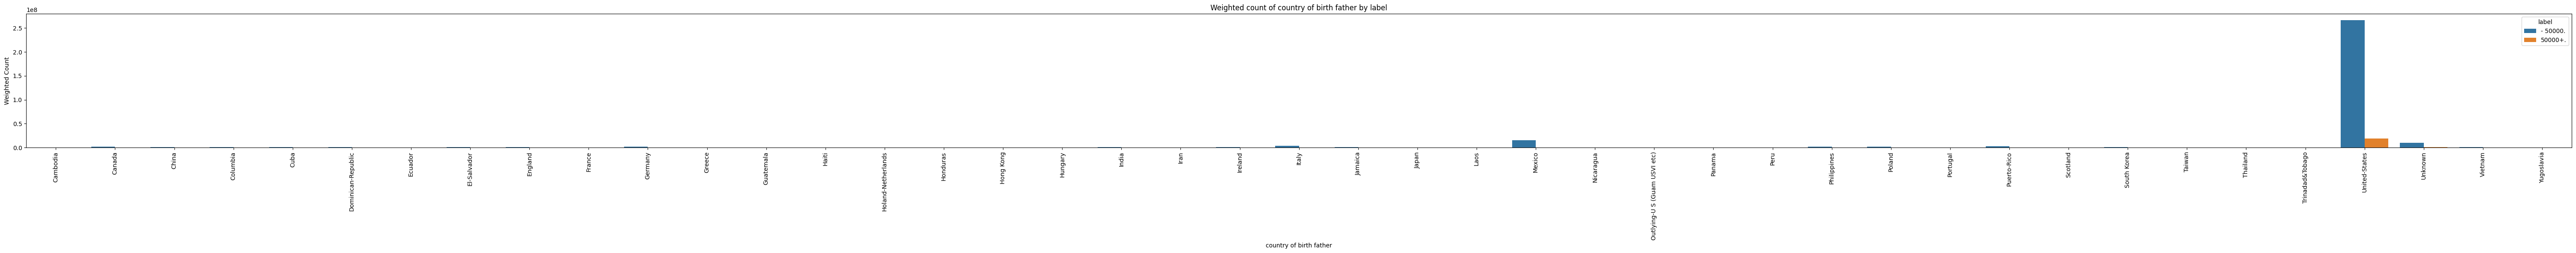

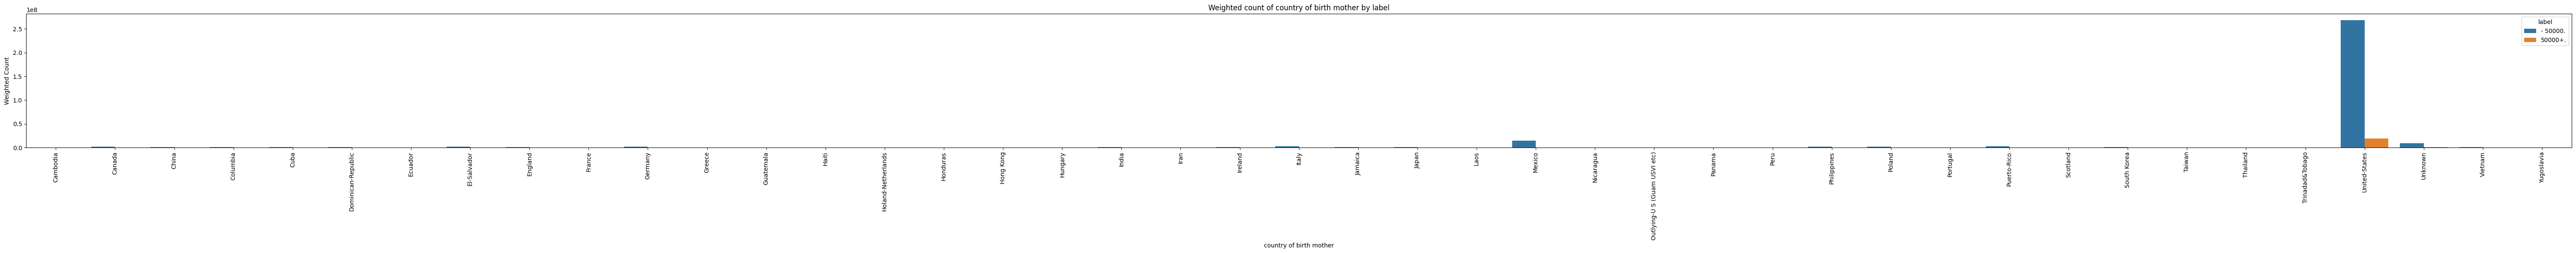

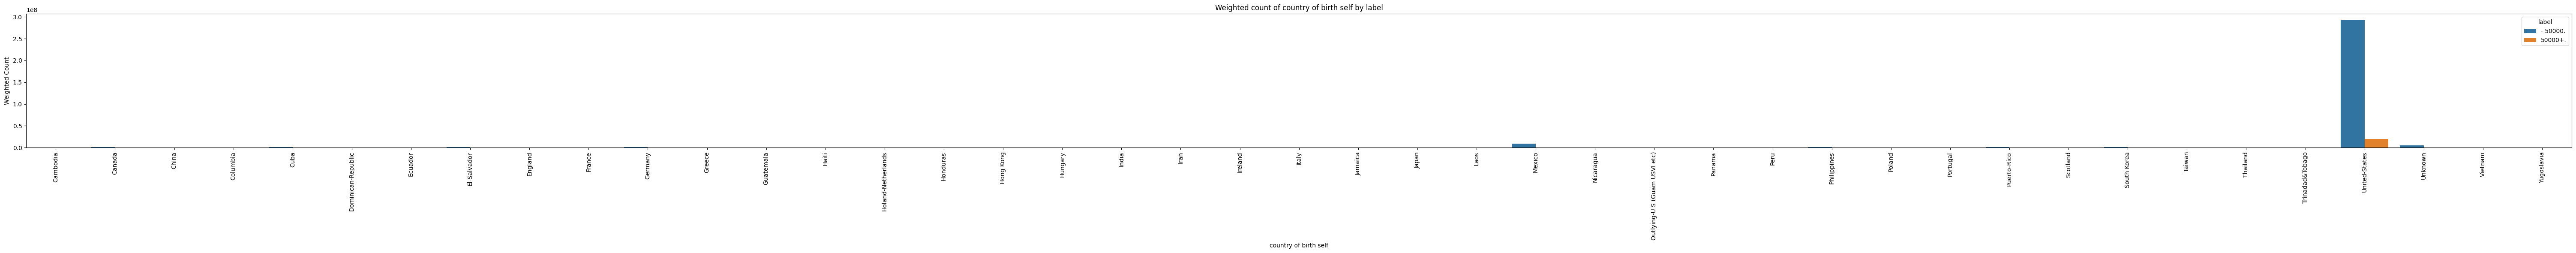

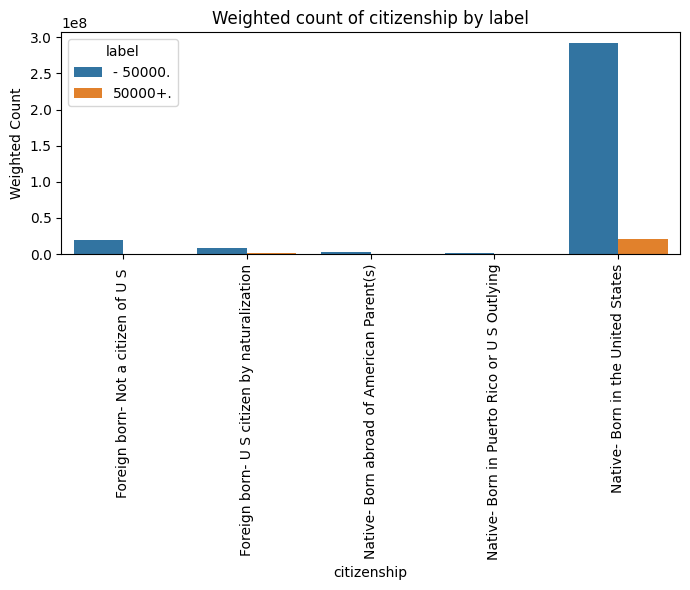

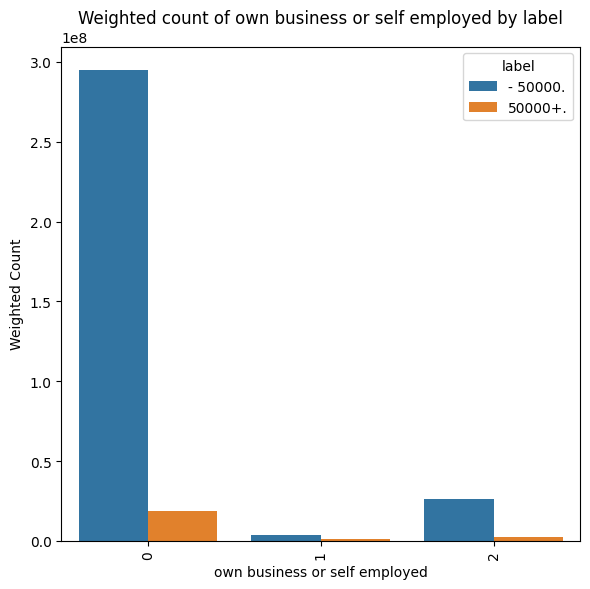

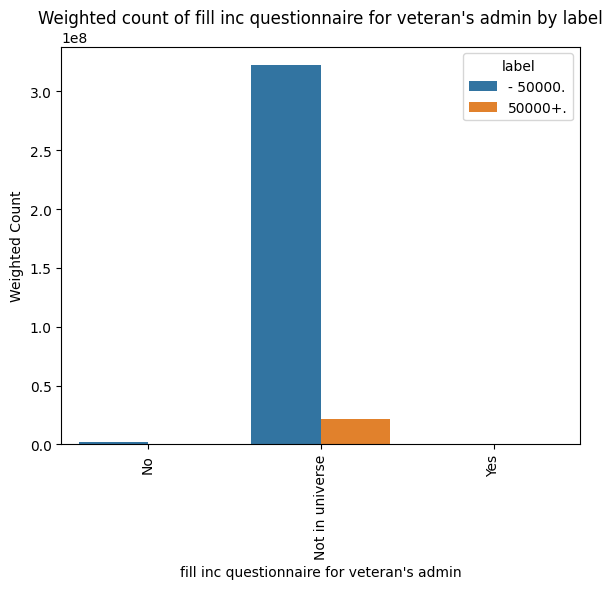

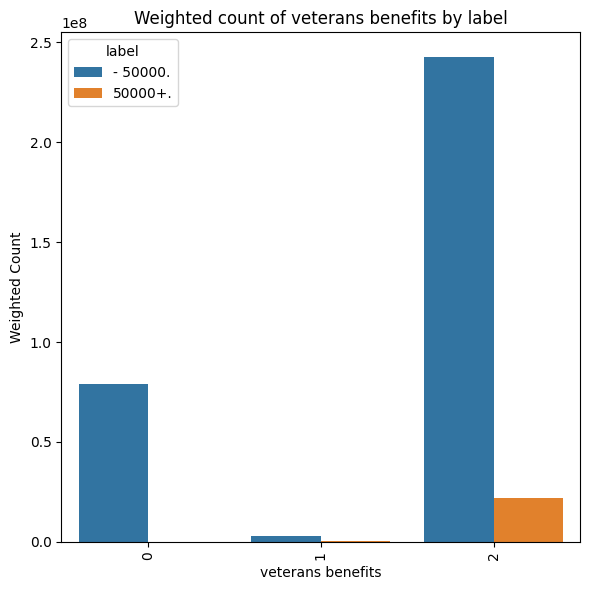

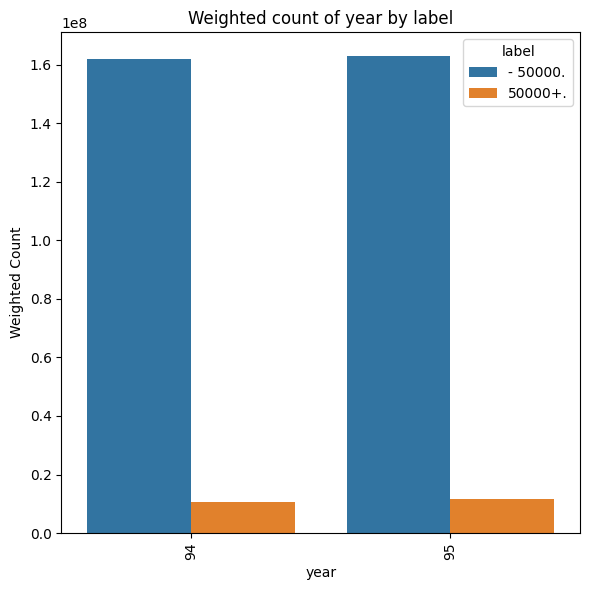

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def countplot(df, category_col, label_col, weight_col):
    agg = (df.groupby([category_col, label_col])[weight_col]
             .sum()
             .reset_index(name='weighted_count'))

    fig, ax = plt.subplots(figsize=(max(6, df[category_col].nunique() * 1.4), 6))

    sns.barplot(data=agg, x=category_col, y='weighted_count',
                hue=label_col, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f'Weighted count of {category_col} by {label_col}')
    ax.set_ylabel('Weighted Count')
    plt.tight_layout()
    plt.show()

for i in categorical_columns:
  countplot(df, i, 'label', 'weight')

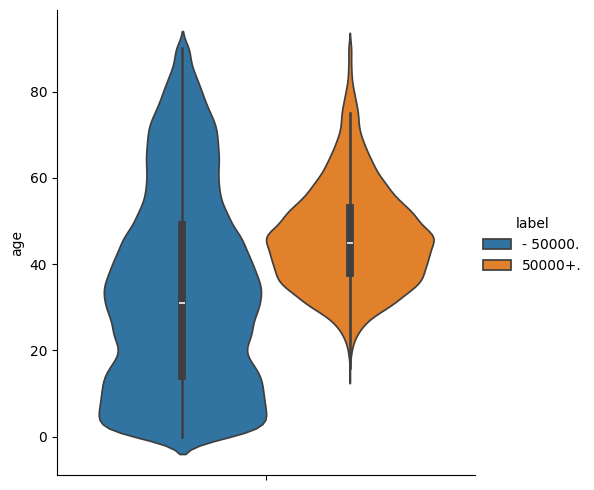

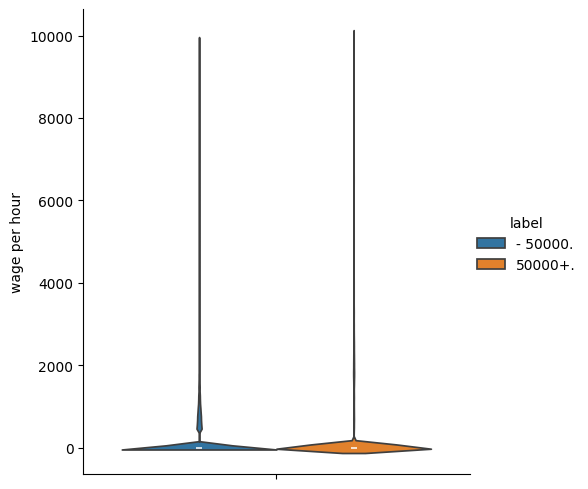

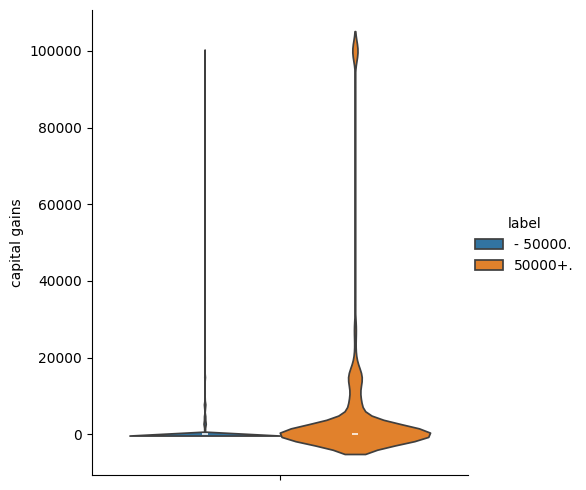

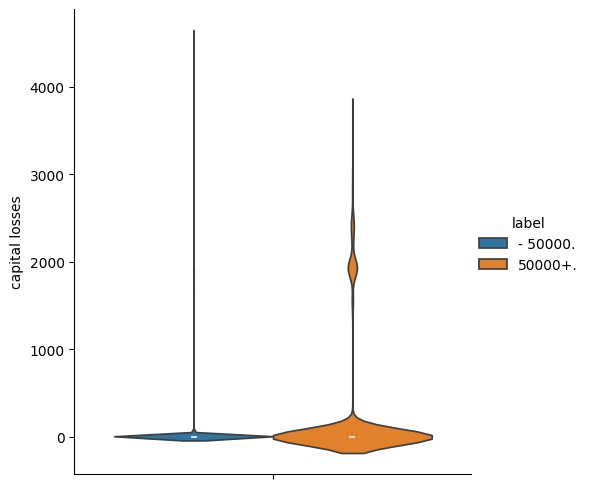

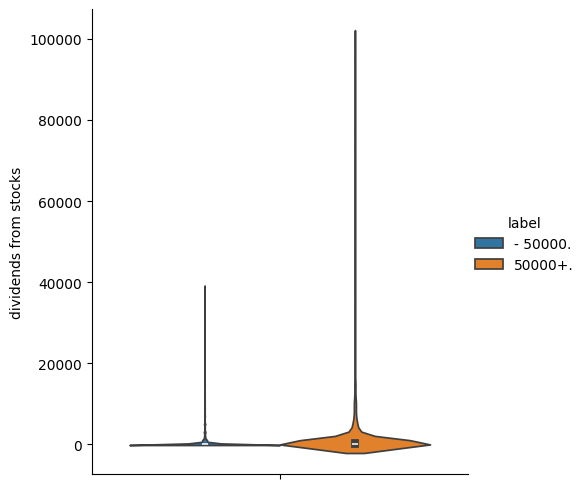

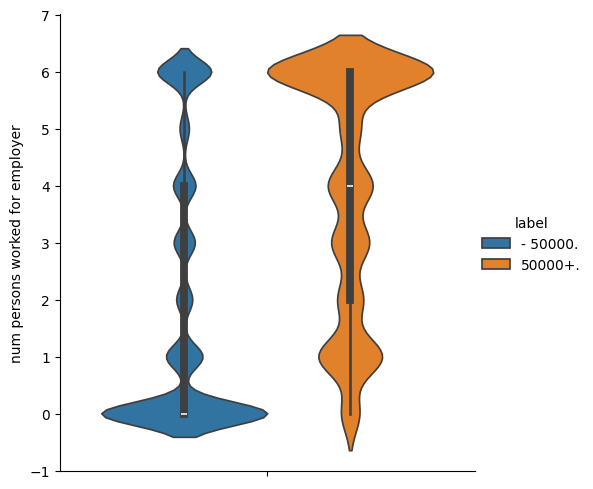

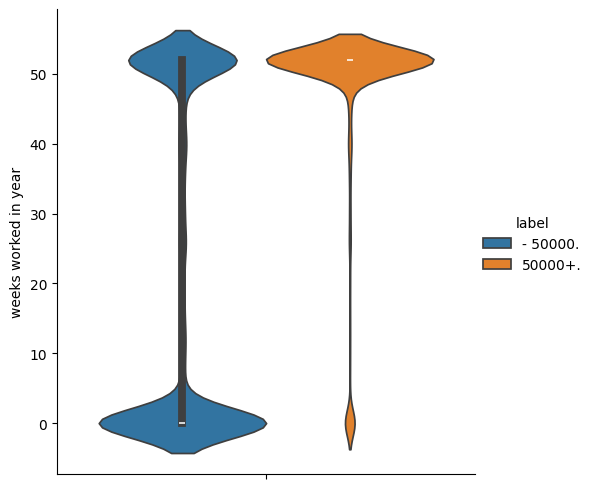

In [ ]:
#numerical
for i in continuous_columns:
  sns.catplot(data=df, y=i, hue="label", kind="violin",weights = df['weight'])
  plt.show()

# Multivariate

In [ ]:
df['income'] = df['label'].map({'- 50000.': 0, '50000+.': 1})

<Axes: >

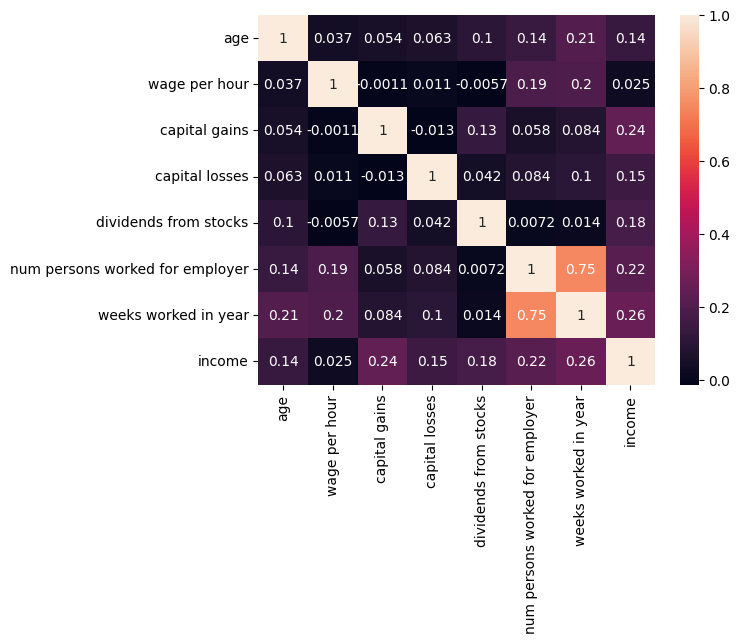

In [ ]:
sns.heatmap(df[continuous_columns + ["income"]].corr(),annot=True)

In [ ]:
categorical_columns

['class of worker',
 'detailed industry recode',
 'detailed occupation recode',
 'education',
 'enroll in edu inst last wk',
 'marital stat',
 'major industry code',
 'major occupation code',
 'race',
 'hispanic origin',
 'sex',
 'member of a labor union',
 'reason for unemployment',
 'full or part time employment stat',
 'tax filer stat',
 'region of previous residence',
 'state of previous residence',
 'detailed household and family stat',
 'detailed household summary in household',
 'migration code-change in msa',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'migration prev res in sunbelt',
 'family members under 18',
 'country of birth father',
 'country of birth mother',
 'country of birth self',
 'citizenship',
 'own business or self employed',
 "fill inc questionnaire for veteran's admin",
 'veterans benefits',
 'year']

In [ ]:
df2 = pd.get_dummies(df, columns=categorical_columns)


In [ ]:
cat = df2.columns.difference(continuous_columns+['weight','label'])

In [ ]:
cat

Index(['citizenship_Foreign born- Not a citizen of U S ',
       'citizenship_Foreign born- U S citizen by naturalization',
       'citizenship_Native- Born abroad of American Parent(s)',
       'citizenship_Native- Born in Puerto Rico or U S Outlying',
       'citizenship_Native- Born in the United States',
       'class of worker_Federal government',
       'class of worker_Local government', 'class of worker_Never worked',
       'class of worker_Not in universe', 'class of worker_Private',
       ...
       'tax filer stat_Joint both 65+', 'tax filer stat_Joint both under 65',
       'tax filer stat_Joint one under 65 & one 65+',
       'tax filer stat_Nonfiler', 'tax filer stat_Single',
       'veterans benefits_0', 'veterans benefits_1', 'veterans benefits_2',
       'year_94', 'year_95'],
      dtype='object', length=504)

In [ ]:
df2.drop(['label'],axis = 1,inplace = True)

In [ ]:
correlations = df2.corr()['income'].sort_values(key=abs, ascending=False)

In [ ]:
print("Top 20 most correlated features (by absolute value):")
correlations.head(n=20)

Top 20 most correlated features (by absolute value):


income                                                  1.000000
weeks worked in year                                    0.262316
major occupation code_Executive admin and managerial    0.241584
capital gains                                           0.240725
detailed occupation recode_2                            0.230988
num persons worked for employer                         0.222684
detailed occupation recode_0                           -0.221969
major occupation code_Not in universe                  -0.221969
major industry code_Not in universe or children        -0.221969
detailed industry recode_0                             -0.221969
class of worker_Not in universe                        -0.220914
detailed household and family stat_Householder          0.213482
detailed household summary in household_Householder     0.212778
major occupation code_Professional specialty            0.212686
tax filer stat_Joint both under 65                      0.205193
tax filer stat_Nonfiler                                -0.198326
education_Masters degree(MA MS MEng MEd MSW MBA)        0.190403
education_Prof school degree (MD DDS DVM LLB JD)        0.188815
education_Bachelors degree(BA AB BS)                    0.186097
marital stat_Married-civilian spouse present            0.183949
Name: income, dtype: float64